# 주제

---
*2조 : 이형언, 권남우, 김수현, 김종현, 소국희*

쿠팡에서 판매되고 있는 액체, 분말, 시트 총 3종류의 세탁세제 긍정/부정 리뷰를 분석하여,


 각 종류별 세탁세제의 특성을 파악하고 소비자가 해당 유형 세제를 선택한 이유를 확인한다.

# Work Flow
---
# 1.   리뷰 크롤링


*   액체 세탁세제 리뷰 크롤링
*   분말 세탁세제 리뷰 크롤링
*   시트 세탁세제 리뷰 크롤링
*   크롤링 데이터 통합
*   라벨링
*   최종 데이터 저장

# 2.  텍스트 마이닝


*   데이터 구축 (EDA, 분할, 토큰화, 노이즈, 벡터화)
*   모델링 (나이브, 로지스틱, 랜덤 포레스트, XGB)





# 리뷰 크롤링

---

쿠팡 웹 사이트의 카테고리에서 생활용품 -> 세탁세제 ->  액체세제, 분말세제, 시트세제의 리뷰를 크롤링 하여 통합한다. (https://www.coupang.com/)


그 뒤, 평점을 통해 긍정 리뷰와 부정 리뷰를 구분하여 새로운 변수(label)를 생성한다.

## BeautifulSoup를 활용한 크롤링

### 액체 세제 리뷰 크롤링

In [ ]:
# 액체 세제 제품 리뷰 별점 별로 가져오기

# 필요한 라이브러리
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

for page in range(1, 5+1): # 5페이지에서 세탁세제 상품 정보를 가져온다
    category_url = 'https://www.coupang.com/np/categories/399743?listSize=60&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page='+str(page)+'&channel=user&fromComponent=N&selectedPlpKeepFilter=&sorter=saleCountDesc&filter=&component=399643&rating=0'
    category_resp = requests.get(category_url)
    category_soup = BeautifulSoup(category_resp.content, 'lxml')
    
    prduct_info = {}
    
    ID_tags = category_soup.select('a.baby-product-link')
    
    for i in range(len(ID_tags)):
        product_ID = ID_tags[i]['href'].split('?')[0].split('/')[-1]
        item_ID = ID_tags[i]['href'].split('itemId=')[-1].split('&')[0]
        vendor_ID = ID_tags[i]['href'].split('vendorItemId=')[-1].split('&')[0]

        prduct_info[product_ID]={
                                 'item_ID':item_ID, # item id
                                 'vendor_ID':vendor_ID # vendor id
                                } 

dict_wash = {
    '유형': [],
    '리뷰': [],
    '도움': [],
    '날짜': [],
    '평점': []
            }


for product_ID in tqdm(list(prduct_info.keys()), desc='상품 별 크롤링 중'):
    
    for rate_num in tqdm(range(1, 5+1), desc='별점 별 크롤링 중'): # 별 4개 이상은 50개 / 3개 이하는 200개의 리뷰를 가져온다
        pages = 200
        if rate_num >= 4:
            pages = 50 
            
        for rev_page in tqdm(range(1, pages+1), desc='리뷰 크롤링 중'): 


            product_url = 'https://www.coupang.com/vp/product/reviews?'

            product_params = {
                    'productId':product_ID,
                    'page':rev_page,
                    'size':5,
                    'sortBy':'ORDER_SCORE_ASC',
                    'ratings':rate_num,
                    'viRoleCode':3,
                    'ratingSummary':'true'
            }

            headers = {
                        "referer": "https://www.coupang.com/vp/products/"+product_ID+"?itemId="+prduct_info[product_ID]["item_ID"]+"&vendorItemId="+prduct_info[product_ID]["vendor_ID"]+"&sourceType=CATEGORY&categoryId=399643&isAddedCart=",
                        "user-agent": "",
                        "cookie": ""
            }

            product_resp = requests.get(product_url, params=product_params, headers=headers)

            product_soup = BeautifulSoup(product_resp.content, 'lxml')

            rev_tags = product_soup.select('div.sdp-review__article__list__review__content')

            rate_tags = product_soup.select('div.sdp-review__article__list__info__product-info__star-orange')

            help_tags = product_soup.select('span.js_reviewArticleHelpfulCount')

            date_tags = product_soup.select('div.sdp-review__article__list__info__product-info__reg-date')

            for i in range(len(rev_tags)):
                dict_wash['유형'].append('액체')
                dict_wash['리뷰'].append(rev_tags[i].text.replace('\n', '').strip())
                dict_wash['평점'].append(rate_tags[i]['data-rating'])
                dict_wash['도움'].append(help_tags[i].text)
                dict_wash['날짜'].append(date_tags[i].text)

        
import pandas as pd
liquid_df  = pd.DataFrame(dict_wash)

KeyboardInterrupt: ignored

### 분말 세제 리뷰 크롤링

In [ ]:
# 분말 세제 제품 리뷰 별점 별로 가져오기

# 필요한 라이브러리
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

for page in range(1, 5+1): # 5페이지에서 세탁세제 상품 정보를 가져온다
    category_url = 'https://www.coupang.com/np/categories/399744?listSize=60&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page='+str(page)+'&channel=user&fromComponent=N&selectedPlpKeepFilter=&sorter=saleCountDesc&filter=&component=399644&rating=0'
    category_resp = requests.get(category_url)
    category_soup = BeautifulSoup(category_resp.content, 'lxml')
    
    prduct_info = {}
    
    ID_tags = category_soup.select('a.baby-product-link')
    
    for i in range(len(ID_tags)):
        product_ID = ID_tags[i]['href'].split('?')[0].split('/')[-1]
        item_ID = ID_tags[i]['href'].split('itemId=')[-1].split('&')[0]
        vendor_ID = ID_tags[i]['href'].split('vendorItemId=')[-1].split('&')[0]

        prduct_info[product_ID]={
                                 'item_ID':item_ID, # item id
                                 'vendor_ID':vendor_ID # vendor id
                                } 

dict_wash = {
    '유형': [],
    '리뷰': [],
    '도움': [],
    '날짜': [],
    '평점': []
            }


for product_ID in tqdm(list(prduct_info.keys()), desc='상품 별 크롤링 중'):


    
    for rate_num in tqdm(range(1, 5+1), desc='별점 별 크롤링 중'): # 별 4개 이상은 50개 / 3개 이하는 200개의 리뷰를 가져온다
        pages = 200
        if rate_num >= 4:
            pages = 50   
        for rev_page in tqdm(range(1, pages+1), desc='리뷰 크롤링 중'): 


            product_url = 'https://www.coupang.com/vp/product/reviews?'

            product_params = {
                    'productId':product_ID,
                    'page':rev_page,
                    'size':5,
                    'sortBy':'ORDER_SCORE_ASC',
                    'ratings':rate_num,
                    'viRoleCode':3,
                    'ratingSummary':'true'
            }

            headers = {
                        "referer": "https://www.coupang.com/vp/products/"+product_ID+"?itemId="+prduct_info[product_ID]["item_ID"]+"&vendorItemId="+prduct_info[product_ID]["vendor_ID"]+"&sourceType=CATEGORY&categoryId=399644&isAddedCart=",
                        "user-agent": "",
                        "cookie": ""
            }

            product_resp = requests.get(product_url, params=product_params, headers=headers)

            product_soup = BeautifulSoup(product_resp.content, 'lxml')

            rev_tags = product_soup.select('div.sdp-review__article__list__review__content')

            rate_tags = product_soup.select('div.sdp-review__article__list__info__product-info__star-orange')

            help_tags = product_soup.select('span.js_reviewArticleHelpfulCount')

            date_tags = product_soup.select('div.sdp-review__article__list__info__product-info__reg-date')

            for i in range(len(rev_tags)):
                dict_wash['유형'].append('분말')
                dict_wash['리뷰'].append(rev_tags[i].text.replace('\n', '').strip())
                dict_wash['평점'].append(rate_tags[i]['data-rating'])
                dict_wash['도움'].append(help_tags[i].text)
                dict_wash['날짜'].append(date_tags[i].text)

        
import pandas as pd
powder_df  = pd.DataFrame(dict_wash)

## Selenium를 활용한 웹 크롤링

In [ ]:
pip install selenium

     |████████████████████████████████| 968 kB 19.2 MB/s 
     |████████████████████████████████| 138 kB 53.7 MB/s 
     |████████████████████████████████| 359 kB 73.0 MB/s 
     |████████████████████████████████| 3.6 MB 62.1 MB/s 
     |████████████████████████████████| 55 kB 4.8 MB/s 
     |████████████████████████████████| 58 kB 8.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from bs4 import BeautifulSoup #필요한 라이브러리 호출
import requests
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium import webdriver
from fake_useragent import UserAgent
from selenium.webdriver.common.action_chains import ActionChains
import json 
from tqdm.notebook import tqdm

ModuleNotFoundError: ignored

In [ ]:
#셀레리움에필요한 product , item , vendor 값을 세제 페이지에서 가져옴 .
for page in range(1, 3+1):
    category_url = 'https://www.coupang.com/np/categories/498014?listSize=60&brand=&offerCondition=&filterType=&isPriceRange=false&minPrice=&maxPrice=&page='+str(page)+'&channel=user&fromComponent=Y&selectedPlpKeepFilter=&sorter=saleCountDesc&filter=&component=497914&rating=0'


    category_resp = requests.get(category_url)

    category_soup = BeautifulSoup(category_resp.content, 'lxml')

    ID_tags = category_soup.select('a.baby-product-link')
    review_num_tags = category_soup.select('span.rating-total-count')
    
    # 제품의 product, item, vendor ID와 리뷰 수를 담을 딕셔너리
    prduct_info = {
        '판매자':[],
        '제품' :[],
        '카테고리':[]
    }
    
    for i in range(len(ID_tags)):
        product_ID = ID_tags[i]['href'].split('?')[0].split('/')[-1]
        item_ID = ID_tags[i]['href'].split('itemId=')[-1].split('&')[0]
        vendor_ID = ID_tags[i]['href'].split('vendorItemId=')[-1].split('&')[0]
        
        prduct_info['판매자'].append(vendor_ID)
        prduct_info['제품'].append(item_ID)
        prduct_info['카테고리'].append(product_ID)

In [ ]:
# 쿠팡리뷰를 셀리리움으로 크롤링하기 위해서는 로그인이 되어야함 .
# 자동으로 로그인해주는 셀레리움코드 ,chorme 드라이브가 설치되어있어야함 .


reviews = {
    '리뷰': []
}

options = webdriver.ChromeOptions() 
options.add_argument("--disable-blink-features=AutomationControlled") 
user_ag = UserAgent().random 
options.add_argument('user-agent=%s'%user_ag) 
options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
options.add_experimental_option("useAutomationExtension", False) 
options.add_experimental_option("prefs", {"prfile.managed_default_content_setting.images": 2}) 
#회피
driver = webdriver.Chrome('chromedriver.exe', options=options) # 크롤링 방지 설정을 undefined로 변경 
driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
    "source": """ Object.defineProperty(navigator, 'webdriver', { get: () => undefined }) """ 
    }) 
login_url = 'https://login.coupang.com/login/login.pang' #로그인 url
driver.get(url=login_url) 
time.sleep(2) 
id_input = driver.find_element_by_xpath('//*[@id="login-email-input"]') 
id_input.send_keys('아이디입력')   #아이디값
pw_input = driver.find_element_by_xpath('//*[@id="login-password-input"]') 
pw_input.send_keys('비밀번호입력')  #비밀번호값
driver.find_element_by_xpath('/html/body/div[1]/div/div/form/div[5]/button').click()
time.sleep(10)
# ---------------------------------------------------------------------------------------  자동로그인


for e in range(len(prduct_info['카테고리'])) :
    driver.get("https://www.coupang.com/vp/products/{0}?itemId={1}&vendorItemId={2}&sourceType=CATEGORY&categoryId=399643&isAddedCart=".format(prduct_info['카테고리'][e], prduct_info['제품'][e] , prduct_info['판매자'][e]))
    #상품정포를원하는 url 입력후 이동 .

    driver.execute_script('window.scrollTo(0, window.scrollY + 600)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 600)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    driver.execute_script('window.scrollTo(0, window.scrollY + 500)')
    time.sleep(1)
    #쿠팡리뷰는 웹페이지가 내려가있어야 가져올수있음. 웹페이지 내려가는 코드

    count = 0
    for c in range(2,12):  #버튼 1~10
        try:
            driver.find_element_by_xpath('//*[@id="btfTab"]/ul[2]/li[2]/div/div[6]/section[4]/div[3]/button[{0}]'.format(c)).click()
            time.sleep(1)
            count = count + 1
            count_num = count/10
            if count_num == 0:
                driver.find_element_by_xpath('//*[@id="btfTab"]/ul[2]/li[2]/div/div[6]/section[4]/div[3]/button[12]').click() #다음페이지
            else:
                for i in range(3,8):
                    oneReview = driver.find_elements(By.CSS_SELECTOR, "#btfTab > ul.tab-contents > li.product-review > div > div.sdp-review__article.js_reviewArticleContainer > section.js_reviewArticleListContainer > article:nth-child({}) > div.sdp-review__article__list__review.js_reviewArticleContentContainer > div".format(i))
                    time.sleep(1)
                    for oneviews in oneReview:
                        reviews['리뷰'].append(oneviews.text)
        except :
                for i in range(3,8):
                    oneReview = driver.find_elements(By.CSS_SELECTOR, "#btfTab > ul.tab-contents > li.product-review > div > div.sdp-review__article.js_reviewArticleContainer > section.js_reviewArticleListContainer > article:nth-child({}) > div.sdp-review__article__list__review.js_reviewArticleContentContainer > div".format(i))
                    time.sleep(1)
                    for oneviews in oneReview:
                                reviews['리뷰'].append(oneviews.text)
                                    


## 데이터 가공

### 데이터 통합

In [ ]:
import pandas as pd

# 크롤링한 3 종류의 데이터를 통합한다
coopang = pd.concat([liquid_df, powder_df], axis = 0)

### 라벨링

In [ ]:
# 평점 4점 이상은 긍정 리뷰 / 평점 3점 이하는 부정 리뷰로 간주하여,
# 'label'에 긍정 리뷰는 1 / 부정 리뷰는 0 value를 준다

cond_positive = (coopang['평점']>=4)

coopang.loc[cond_positive, 'label'] = 1
coopang.loc[~cond_positive, 'label'] = 0

### 최종 크롤링 데이터 저장

In [ ]:
coopang.to_csv('쿠팡_세탁세제_리뷰.csv')

# 텍스트 마이닝

---


시각화 (막대 그래프 & 워드클라우드)를 통해 데이터를 확인하여, 텍스트 마이닝에 필요한 전처리를 한다. (데이터 구축)


그 뒤, 4 종류의 머선러닝 모델을 통해 성능을 확인 및 비교하여 유형별 최종 모델을 선택한다. (모델링)

## 데이터 구축


In [ ]:
!gdown 

Downloading...
From: https://drive.google.com/uc?id=1Wcxrbww5HF-ybQYO-9kHmg6H2GdGsPID
To: /content/쿠팡_세탁세제_리뷰.csv
100% 4.66M/4.66M [00:00<00:00, 29.6MB/s]


In [ ]:
import pandas as pd

coopang = pd.read_csv('세탁세제_쿠팡_리뷰.csv')

In [ ]:
coopang.head(5)

,Unnamed: 0,Unnamed: 0.1,유형,리뷰,도움,날짜,평점,label
0,0,0,액체,쿠팡에서구매해서 사용한지 1년쯤 됐는데 갑자기 금액이 넘많이 올랐어요,0,2020.01.03,1,0.0
1,1,1,액체,향이 넘나 밸로인것 ㅠㅠㅠㅠㅠ 크르을러어우응 ㅠ,0,2019.11.03,1,0.0
2,2,2,액체,배송이 잘못된건지 불량을 잘못보내신건지..세제가 터져서 줄줄 세서왔습니다ㅡㅡ반품하려...,5,2016.08.09,1,0.0
3,3,3,액체,상품이파손되어 왔어요.새지 않게 포장해서 보내주세요.,0,2020.06.10,1,0.0
4,4,4,액체,세제 2개주문 했는데 1개만 왔어요~,0,2018.08.18,2,0.0


In [ ]:
coopang.tail(5)

,Unnamed: 0,Unnamed: 0.1,유형,리뷰,도움,날짜,평점,label
15137,15137,15137,시트,배송빠르고 사용하기 편해서 좋아요,3,2018.12.16,5,1.0
15138,15138,15138,시트,"냄새도 좋고, 사용하기도 편리합니다",0,2021.01.02,5,1.0
15139,15139,15139,시트,액체세제 그만 쓰고 싶어서 (플라스틱 때문에) 검색해서 찾은 제품입니다. 세척력도 ...,2,2021.01.19,5,1.0
15140,15140,15140,시트,진짜 리뷰 잘 안 쓰는 편인데 너무 좋아서 남깁니다 빨래 세제 여기로 정착했습니다,2,2021.02.07,5,1.0
15141,15141,15141,시트,유투브 보고 추천하길래 구매해봤습니다. 세재 잔여물이 남는게 싫어서 구매했는데 그만...,0,2021.05.11,3,0.0


In [ ]:
# 불필요한 컬럼 제거
coopang = coopang.drop(columns='Unnamed: 0')

In [ ]:
coopang.columns
# 유형 : 세텍세제 종류
# 리뷰 : 고객이 남긴 후기
# 도움 : 다른 고객이 해당 후기를 보고 도움이 된 것에 대한 표기
# 날짜 : 해당 리뷰가 작성된 날짜
# 평점 : 구매자가 해당 상품에 대해 매긴 점수 (5점 만점)
# label : 평점 4정 이상은 긍정 리뷰 (1) / 평점 3점 이하는 부정 리뷰 (0)

Index(['Unnamed: 0.1', '유형', '리뷰', '도움', '날짜', '평점', 'label'], dtype='object')

In [ ]:
coopang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15142 entries, 0 to 15141
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  15142 non-null  int64  
 1   유형            15142 non-null  object 
 2   리뷰            15142 non-null  object 
 3   도움            15142 non-null  int64  
 4   날짜            15142 non-null  object 
 5   평점            15142 non-null  int64  
 6   label         15142 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 828.2+ KB


### 기본적인 시각화
세탁세제 유형별 리뷰 수 및 긍정/부정 리뷰 수 확인

##### 기본적인 시각화 설정

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSq

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##### 그래프로 원본 데이터 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_

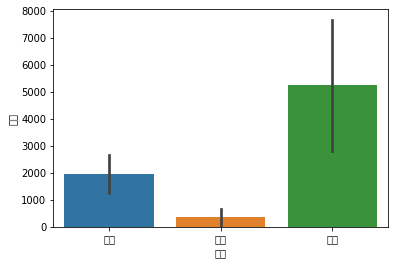

In [ ]:
# 세탁세제 유형별 리뷰 수
df = coopang.groupby(['유형', 'label'])['리뷰'].count()
df = df.reset_index()

sns.barplot(data=df, x='유형', y='리뷰')

# 세탁세제 중 액체가 가장 리뷰가 많으면 반명에 시트가 가장 리뷰가 적었다

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_

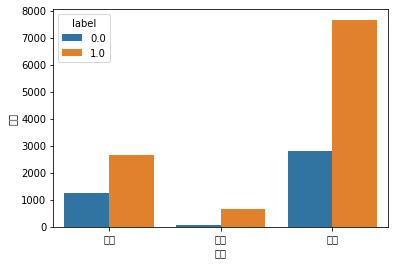

In [ ]:
# 세탁세제 유형별 긍정/부정 리뷰 수
sns.barplot(data=df, x='유형', y='리뷰', hue='label')

# 모든 세탁세제 유형에서 긍정 리뷰가 많다

### 데이터셋 전처리 준비
노이즈 처리할 불용어 확인

통합된 데이터를 액체, 분말, 시트 3 종류로 분할

###### 불용어 확인

In [ ]:
X = coopang['리뷰']

In [ ]:
from tqdm.notebook import tqdm

# 한글 및 공백을 제외한 모든 문자 제거

import re # 정규표현식 사용

X_clean = []


for X_text in tqdm(X):
  X_clean.append(re.sub("[^가-힣\\s]", "", X_text)) # 한글 및 공백을 제외하고 모두 제거

  0%|          | 0/15142 [00:00<?, ?it/s]

In [ ]:
!pip install konlpy # 한글 지원 토큰화 패키지 설치

     |████████████████████████████████| 19.4 MB 6.7 MB/s 
     |████████████████████████████████| 448 kB 47.7 MB/s 


In [ ]:
from konlpy.tag import Okt # OKt 사용

okt = Okt() # Okt 형태소 분리기 사용

X_token = [] # 불용어 확인용

for x_token in tqdm(X_clean):
  X_token.extend(okt.morphs(x_token, stem=True)) # 모든 형태소 / 어간 추출

  0%|          | 0/15142 [00:00<?, ?it/s]

In [ ]:
# 형태소 빈도 수 확인
from collections import Counter

X_count = Counter(X_token)

X_count.most_common(10)

[('하다', 14285),
 ('이', 11895),
 ('좋다', 9476),
 ('에', 7765),
 ('도', 6840),
 ('가', 6392),
 ('세제', 6310),
 ('쓰다', 5052),
 ('향', 4987),
 ('사용', 4276)]

In [ ]:
# 불용어 사전
stop_words = ['하다', '이', '에', '도', '가', '쓰다', '은', '같다', '있다', '보다', '는', '자다',
             '되다', '써다', '아니다', '다', '오다', '왜', '캡', '을', '요', '않다', '를', '로',
             '제', '한', '하고', '다', '이건', '으로', '안', '만', '이다', '것', '시키다', '넣다', '력', '에서', '오다',
             '거', '고', '들', '이라', '저', '피실', '다른', '쓸다', '서',
             '나다', '의', '쿠팡', '후', '나', '중', '통', '에도', '되어다', '재다', '인데', '적',
             '라', '전', '새다', '늘', '대', '게', '네', '까지', '해보다', '걸', '개', '가다', '두',
             '과', '면', '없이' , '그', '나오다', '일', '마트', '인', '진짜', '또', '니', '부터', '빨',
             '예요', '부분', '헤봤다', '엄청', '형', '말', '어', '안나', '처럼', '뭐', '이에요', '지',
             '나서다', '반', '자주', '역시', '돼다', '따로' , '액', '와', '듯', '그레서', '상', '그래도',
             '년', '해', '때문', '보내다', '맘', '앞', '근데', '구', '싶다', '분', '로켓', '비', '이나',
             '대비', '늘다', '다시', '번', '수', '하나', '해주다', '일단' , '용', '시키다', '에는', '이번',
             '랑', '엔', '꾸다', '알다', '같이', '보고', '하', '아주']

##### 데이터 셋 분할 (액체, 분말)

In [ ]:
# 액체 세제
cond_liquid = (coopang['유형'] == '액체')
liquid = coopang.loc[cond_liquid]

# 분말 세제
cond_powder = (coopang['유형'] == '분말')
powder = coopang.loc[cond_powder]

In [ ]:
print(liquid.shape)
print(powder.shape)

(10479, 7)
(3932, 7)


### 워드 클라우드
세탁세제 유형별 긍정/부정 리뷰의 주요 키워드 확인

##### 전체 리뷰

In [ ]:
texts = coopang['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("전체_리뷰.png")

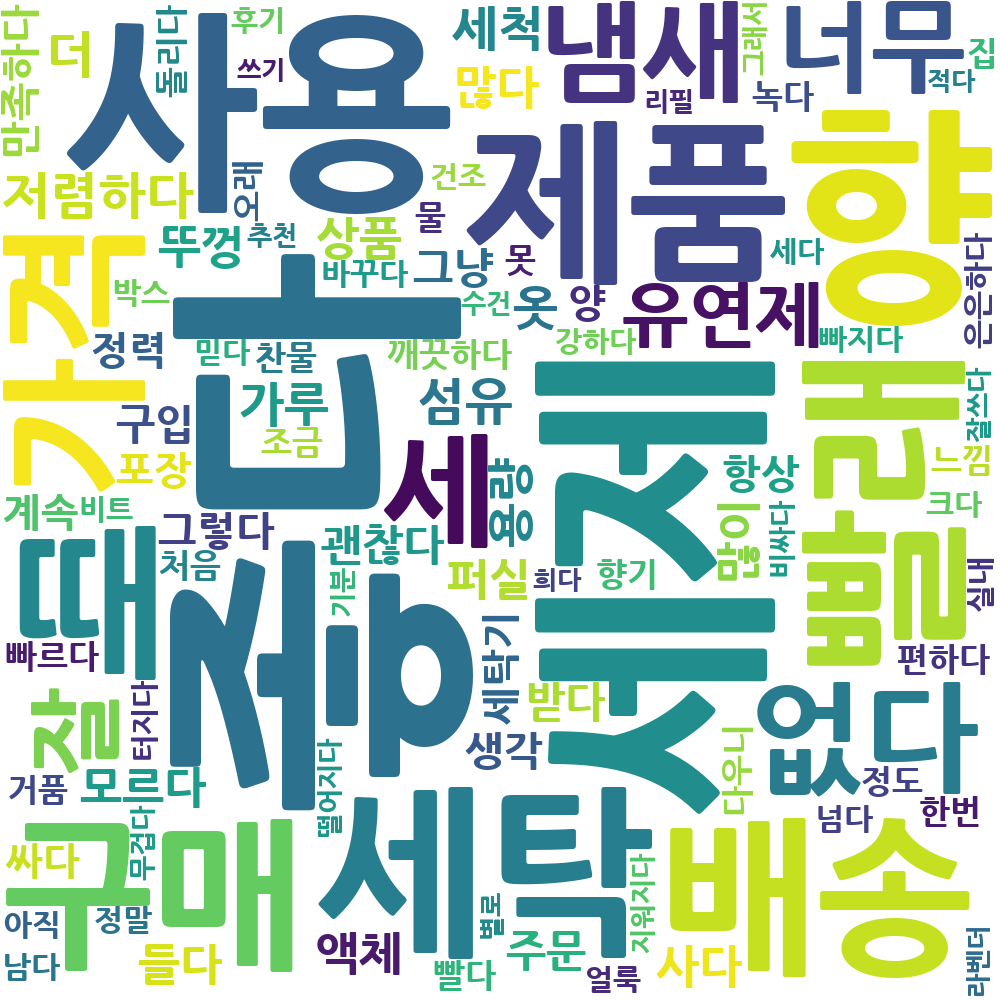

##### 전체 긍정 리뷰

In [ ]:
cond_1 = (coopang['label']==1)
label_1 = coopang.loc[cond_1]

In [ ]:
texts = label_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("긍정_리뷰.png")

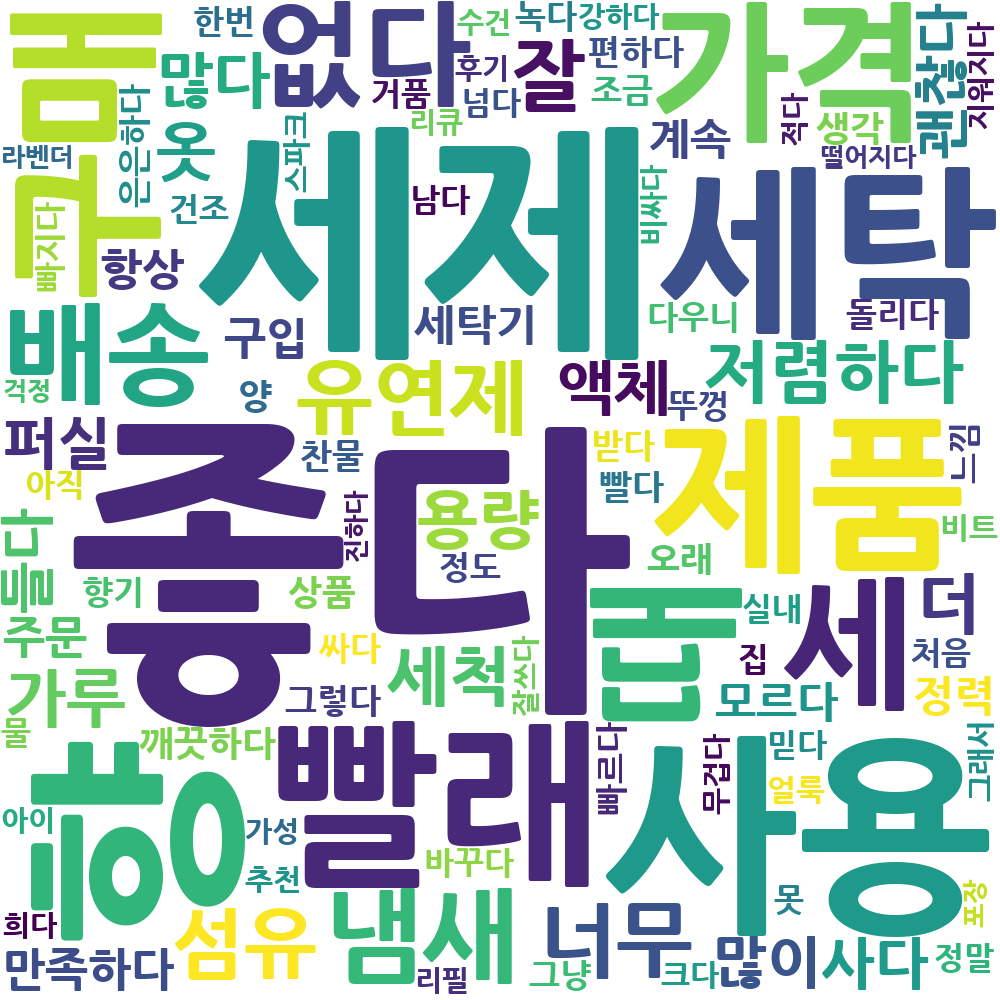

##### 전체 부정 리뷰

In [ ]:
cond_0 = (coopang['label']==0)
label_0 = coopang.loc[cond_0]

In [ ]:
texts = label_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("부정_리뷰.png")

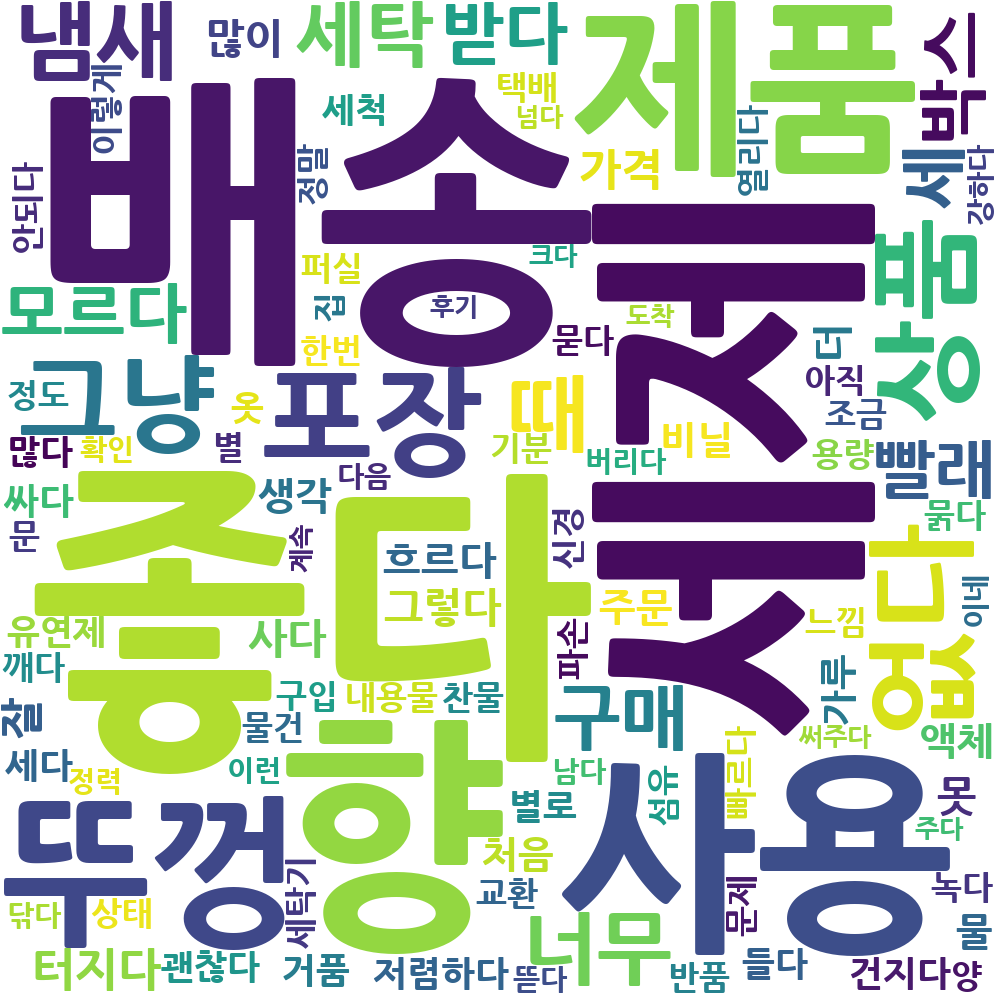

##### 엑체 전체 리뷰

In [ ]:
texts = liquid['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("액체_리뷰.png")

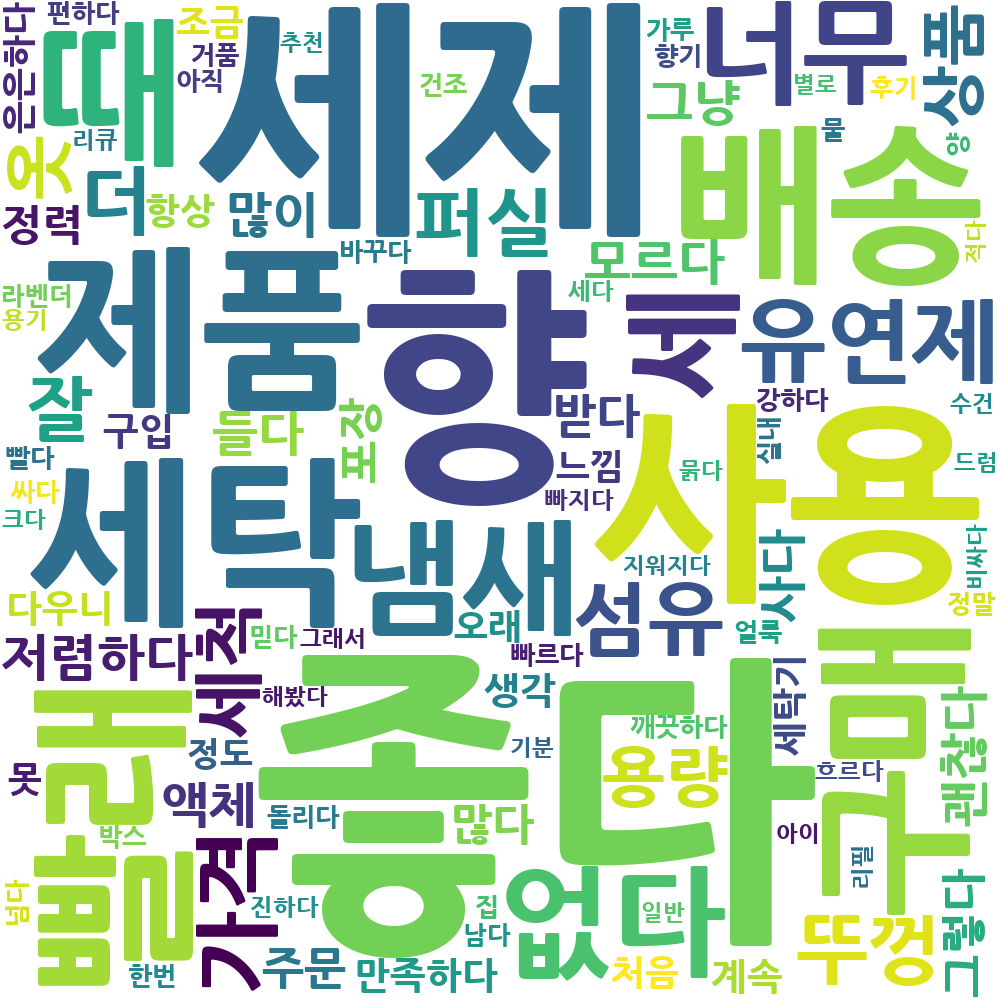

##### 엑체 긍정 리뷰

In [ ]:
cond_liquid_1 = (liquid['label'] == 1)
liquid_1 = liquid.loc[cond_liquid_1]

In [ ]:
texts = liquid_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("액체_긍정_리뷰.png")

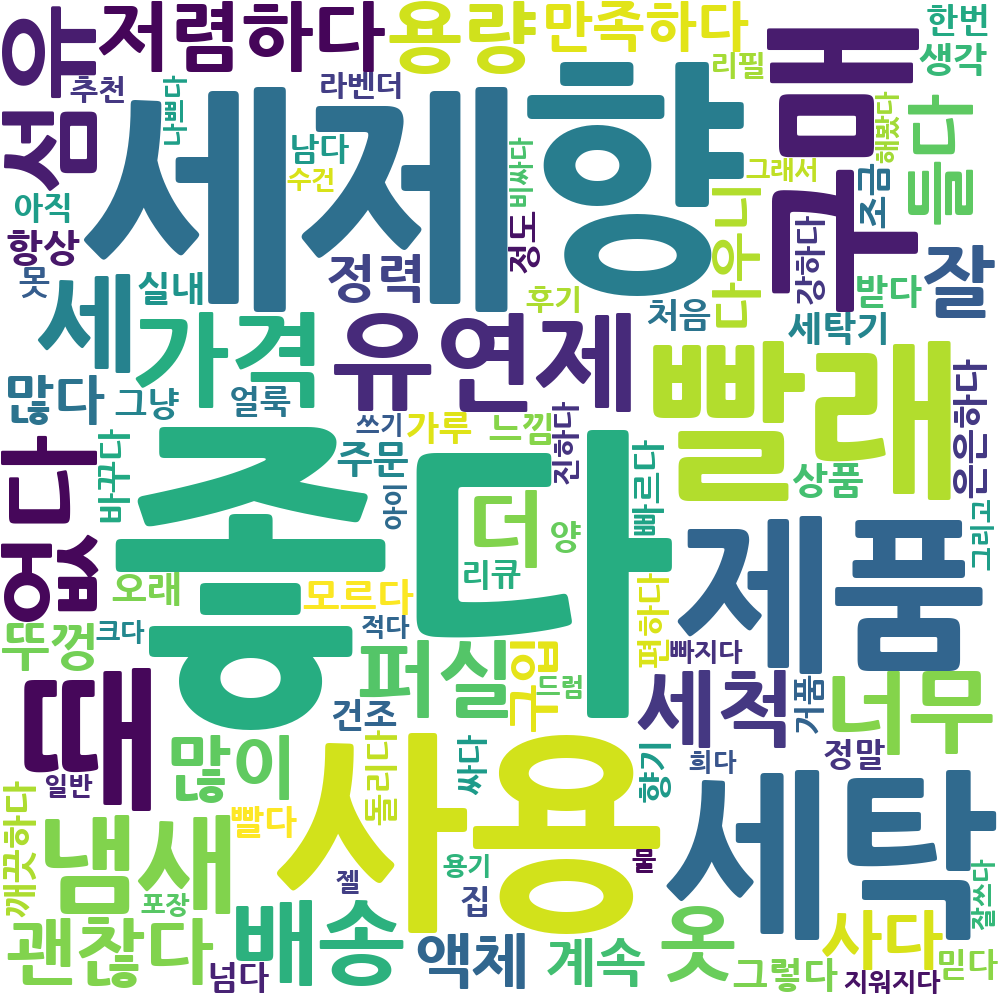

##### 액체 부정 리뷰

In [ ]:
cond_liquid_0 = (liquid['label'] == 0)
liquid_0 = liquid.loc[cond_liquid_0]

In [ ]:
texts = liquid_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("액체_부정_리뷰.png")

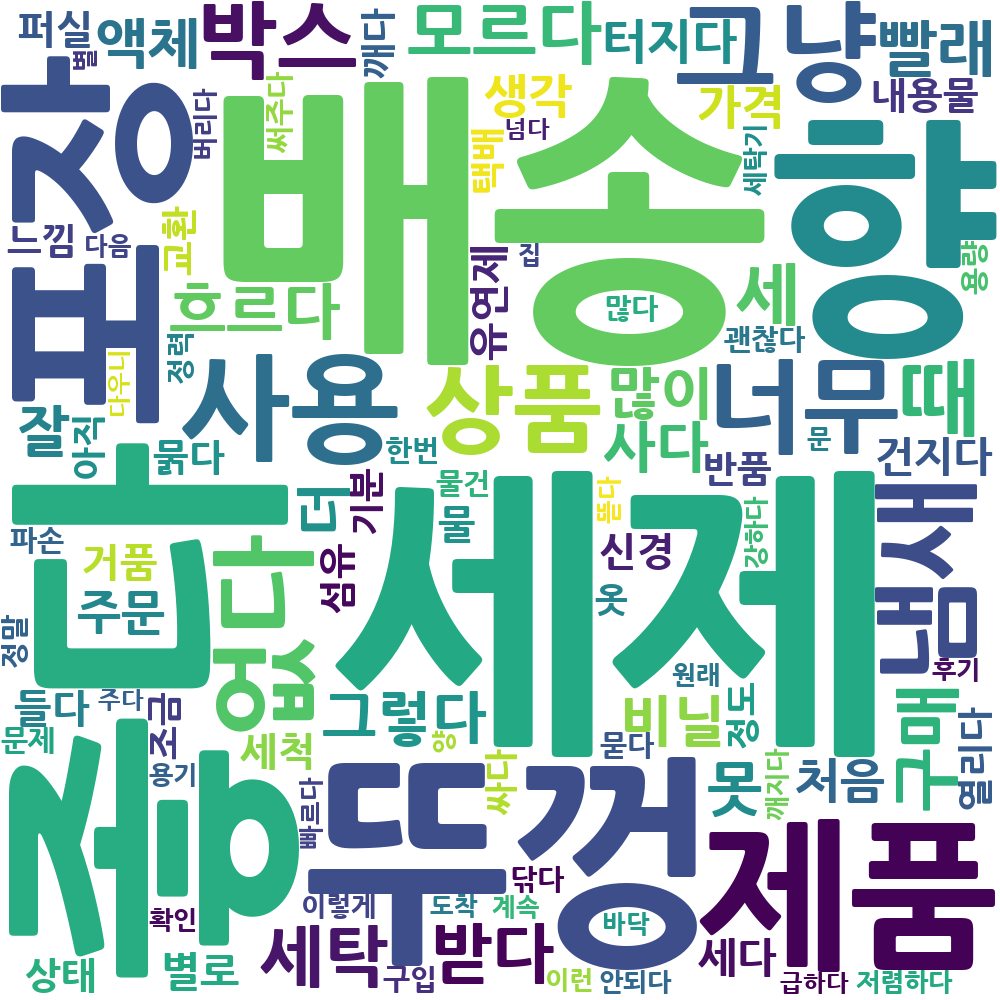

##### 분말 전체 리뷰

In [ ]:
texts = powder['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("분말_리뷰.png")

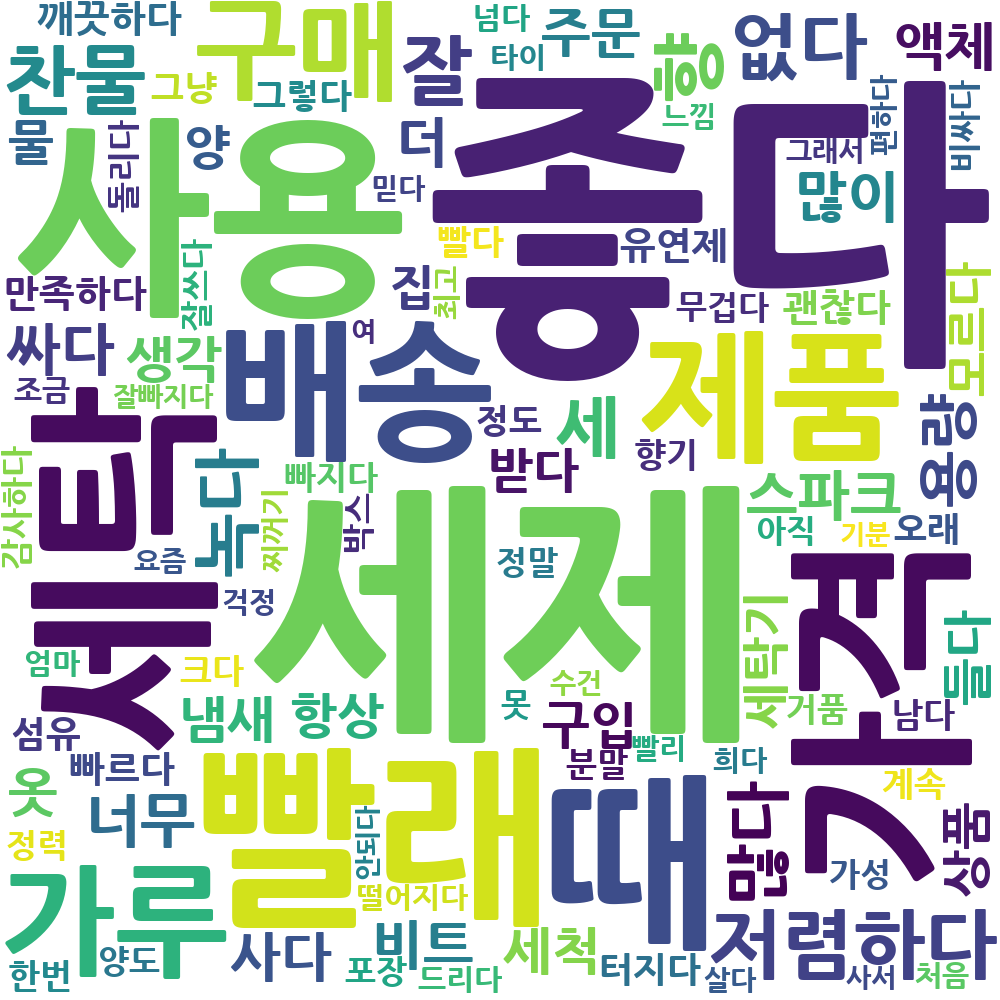

##### 분말 긍정 리뷰

In [ ]:
cond_powder_1 = (powder['label'] == 1)
powder_1 = powder.loc[cond_powder_1]

In [ ]:
texts = powder_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("분말_긍정_리뷰.png")

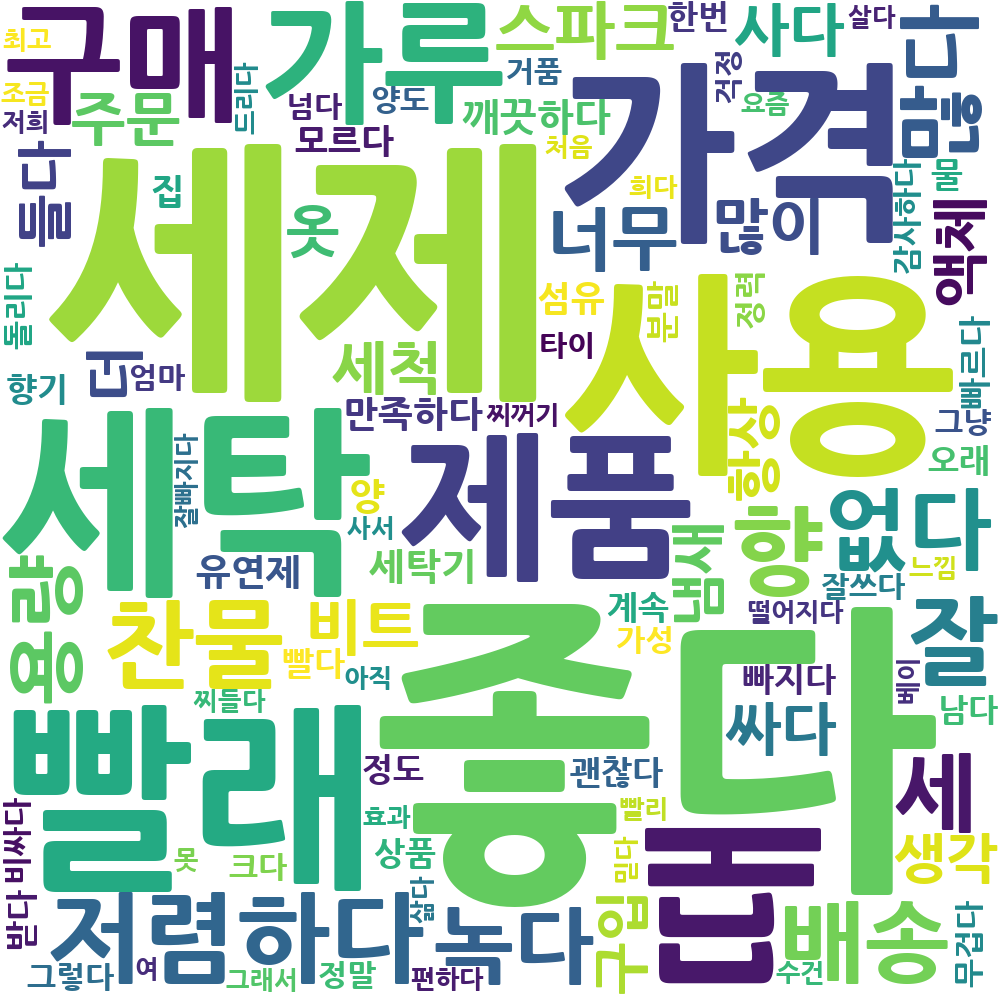

##### 분말 부정 리뷰

In [ ]:
cond_powder_0 = (powder['label'] == 0)
powder_0 = powder.loc[cond_powder_0]

In [ ]:
texts = powder_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words])

from collections import Counter

word_count = Counter(word_cloud)

In [ ]:
word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(word_count))
wc.to_file("분말_부정_리뷰.png")

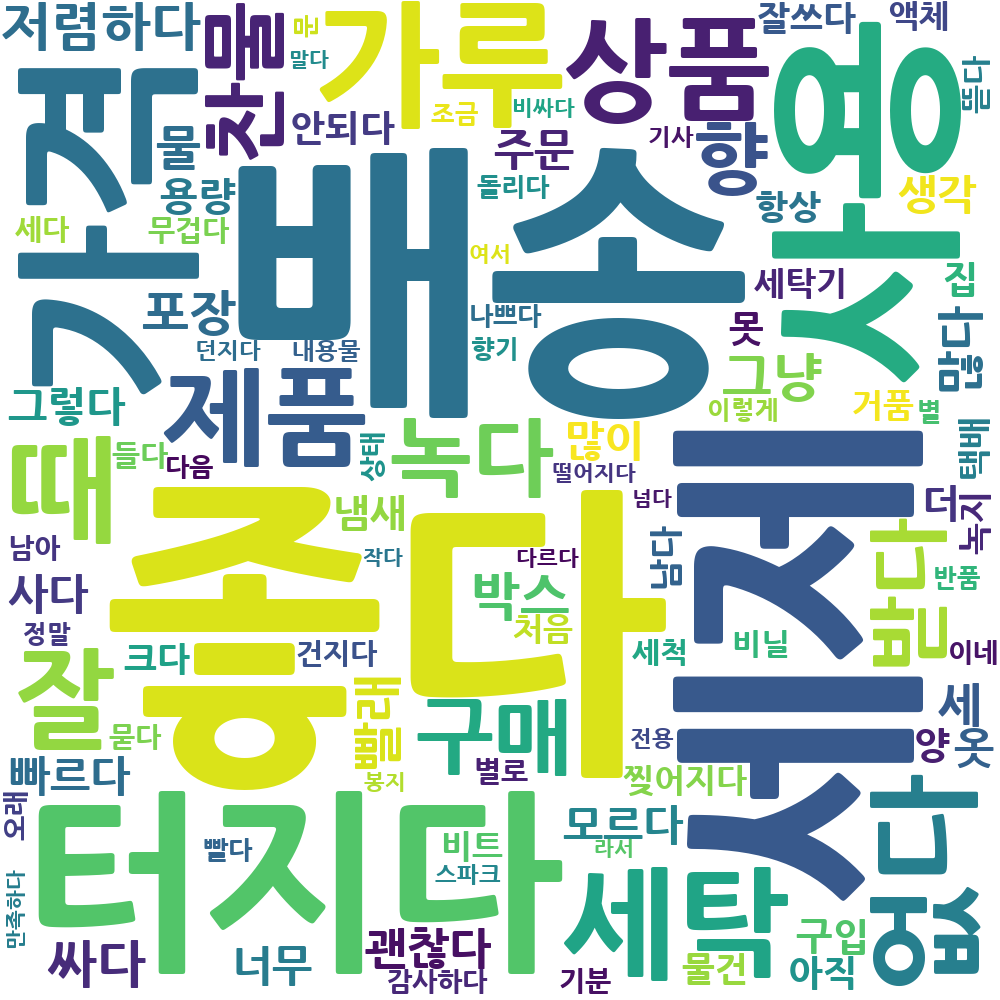

### 불용어 재정의

세탁세제 유형별 및 긍정/부정 리뷰에서 동일한 형태소가 자주 등장한다


그렇기에 불용어를 재정의하여, 리뷰 간 명확한 주요 형태소를 명확히 구분하고자 한다

##### 불용어 재설정



In [ ]:
X_count.most_common(10)

[('하다', 14285),
 ('이', 11895),
 ('좋다', 9476),
 ('에', 7765),
 ('도', 6840),
 ('가', 6392),
 ('세제', 6310),
 ('쓰다', 5052),
 ('향', 4987),
 ('사용', 4276)]

In [ ]:
# 불용어 사전
# 불필요한 형태소와 긍정/부정 리뷰간 겹치는 형태소를 제거한다

stop_words2 = [ '이', '에', '도', '가',  '쓰다', '사용', '은', '같다', '보다', '는', '되다', '자다',  '을', '써다', '배송', '요',
              '를', '구매', '로', '다', '으로', '안',  '세', '만', '이다', '것', '넣다', '유연제', '력', '에서', '더', '제', '섬유', '한', '오다',
              '옷', '거',  '사다', '상품', '들', '고', '저', '이라', '쓸다', '들다', '퍼실', '나다',
              '서', '주문', '받다', '의', '쿠팡', '구입', '후', '생각', '포장', '세탁기', '나', '중', '계속', '통', '정력', '되어다', '에도', '재다',
              '오래', '인데', '적', '빨다', '정도', '라','처음','돌리다', '전', '대', '한번', '집', '새다', '게', '네', '까지', '다우니', 
              '늘', '해보다', '가다', '걸', '개', '과', '아직', '남다',  '일', '그', '넘다', '마트', '면', '두', '박스', '또', '바꾸다', '보고', '하', '꾸다',
              '인', '엔', '같이', '알다','건조', '랑', '용', '다시', '에는', '비트', '수', '하나', '해주다', '세다', '이번', '터지다', '번',
              '싶다', '시키다', '비', '일단', '이나', '대비', '늘다', '해', '로켓', '상', '분', '액',  '맘', '구', '근데', '수건', '앞', '떨어지다', '그래서', '년',
              '보내다', '듯', '그래도', '따로', '희다', '쓰기', '흐르다', '돼다', '반','묻다', '형', '이에요', '스파크', '지', '리큐', '안나',
              '여', '나서다', '일반', '해봤다', '처럼', '뭐','니',  '빨', '예요', '그리고', '부터', '사', '부분', 
              '건지다', '말', '양도', '사서', '썩', '손', '요즘', '두다', '비닐', '다음', '원래', '에요', '젠',
              '신경', '젤', '원','별', '살다', '라서', '시', '이네', '이건', '바로', '엄마', '날', '버리다', '덜다', '기존', '남아',
              '매',  '드리다', '아', '펌프', '주다', '인지', '택배', '건', '유한', '꼭', '몇', '이렇게', '놓다','하지만', '이고',
              '비다', '저희', '어', '도착', '맞다', '따르다', '찾다', '이랑', '이렇다', '니까', '확인', '차다', '문', '지만', '마다', '이용', '짜다', '왜',
              '내용물', '사보다', '지금', '지다', '예전', '여러', '함','경우', '비교', '점', '제로',
              '딱',  '뭔가', '은', '죠', '님', '의사', '내', '약간', '빼다', '알', '째', '사진', '잇다', '새',  '뜯다', '본', '열리다',
              '눈', '필요하다', '만큼', '사람', '흘리다', '하루', '가끔', '입구', '조절', '살짝', '라고', '없어지다', '이불', '서다', '이라서', '양말' ,'깨다',
              '색', '보이다', '자체', '컵', '거기', '파손', '남지','닦다', '함께', '퍼', '타이', '그런', '으로도', '정기', '기', '담다', '타', '리', '잔', '쯕',
              '여서', '우리', '보통', '오늘', '특히', '말다', '판매', '이런', '달', '바닥', '기도', '금방', '두번째', '시간', '햇', '파다', '주', '기사', '청소',
              '첨', '입다', '재', '누르다', '배달', '단', '베이', '곳', '그대로', '감', '부어', '품', '애용', '오', '보다는', '들어가다', '야하다', '땐', '다만', '표백제', '메일',
              '그런데' '월', '편', '맡다', '갈아타다', '이유', '말리다', '드럼세탁기', '정착', '추가', '맨', '어느', '리터',
              '뒤', '데', '보', '커서', '타다', '기다', '래', '담그다', '무엇', '느껴지다', '자취', '등', '선택', '사라지다', '물론',  '써주다', '열다', '전용',
              '에서도', '땀', '덥다', '들이', '속옷', '해도', '막', '작성', '가족', '평소', '슈퍼', '여기', '올리다', '이라고', '깨지다', '부다', '에게', '모두', '우선', '젖다', '동안',
              '낫다', '생기다', '자', '나름', '체험', '가능하다', '줄', '얼마나', '킹소', '보단', '컬러',  '굳다', '널다', '내다', '애', '가지', '무료', '비누', '듭니',
              '예정','하이', '분들', '용이', '인거', '선명하다', '종류', '소', '조', '던지다', '남편', '참고', '새롭다', '몇번',  '할인',
              '봉지', '설명', '제도', '딱하다', '그렇게', '섞다', '장', '쉬다', '혹시', '풀다', '어른', '애벌', '보라색', '꺼내다', '조금씩',
              '임', '열', '담', '이벤트', '여물', '마르다', '만들다', '타입', '선물','하니', '수퍼', '잘나다', '풀리다', '일이', '초록색',
              '들어서다',  '제공', '전이', '왠지', '테이프', '남기다', '글', '상자', '께', '라는', '아프다', '가요', '지는', '직접', '지인', '회사', '산소',
              '요전', '배', '바라다', '옷감', '씻다', '꺼', '한테', '이지만', '파워', '위', '키로', '탁시', '옮기다', '기능', '살', '양으로', '닫다', '진한겔', '난', '집안', 
              '특별하다', '종이', '스푼', '기본', '밖에', '그리다', '놀라다', '프리미엄', '검색', '어머니', '질질', '친구', '한참', '진젤', '펌핑', '겠다', '이지', '볼', '깉다', '신랑',
              '야', '음', '물이', '닫히다', '자꾸', '꼼곰하다', '나요', '으로는', '옆', '속', '감사', '번째', '줄줄', '완료', '찢어지다', '파란다', '묻히다', '빨르다', '첫',
              '유칼립투스', '녹지', '색상', '성', '다가', '산', '사면', '늦다', '똑같다', '로는', '쏟아지다', '특유', '무슨', '피죤', '붙다', '유명하다', '리필용', '미리', '한동안',
              '신청', '아무래도', '힘드다', '그것', '인가', '들이다', '베란다', '싹', '뜨겁다', '난리', '쏘다', '니당다', '요리', '이라도', '달라', '강추',
              '걸리다', '채', '틀다', '부탁드리다', '그거', '옥', '아무리',  '빨때', '아들', '다시다', '어쩔', '식구', '위해', '또한', '피다', '날씨',
              '탓', '먼저', '나가다', '돌아오다', '그때', '중이', '쿠폰', '결과', '대로', '이르다', '움', '쓰시', '필', '고르다', '시작', '쪽',
              '찌다', '달다', '계량', '눕다', '끝', '순간', '그게', '남자','결국', '그동안', '바뀌다', '평이', '어짜피', '식', '키', '섞이다', '들어오다', '따다', '허다', '혼자',
              '머리', '먹다', '줄다', '너', '확', '붓다', '개월', '무궁화', '쯤', '여러가지', '오히려', '현관', '간', '벌써', '뜨다', '건가', '필로', '새벽', '크기', '에서는',
              '취향', '남', '피지', '문자', '연락', '성비', '테크', '시중', '무', '질', '세번', '헤프', '쓰리다', '당연하다', '저번', '홈쇼핑', '집앞', '이니', '개다', '표시', '용다', '호불호',
              '찍다', '냥', '언제', '쓴다', '봣', '생', '당분간', '바', '는걸', '추하다', '랄', '이미', '겁니다', '붙이다', '개봉', '얼마', '인터넷', '아무', '께서', '차이다', '지나다',
              '뀨', '오랫동안', '긋다', '그닥', '집다', '궁금하다', '퍼지다', '뽁뽁이', '친정', '뽑다', '그렇다고', '대신', '고객', '몸', '류', '딥', '방지', '히',
              '불량', '좋아지다', '기분', '안남다', '투명', '드네', '쎄다', '보지', '며', '장마철', '층', '량', '삶', '울', '생활', '매다', '돌아가다', '사다', '따뜻하다', '이름', '높다',
              '팩', '이야', '오래되다', '어리다', '힘', '주변', '뭔', '런가', '에만', '오르다', '사이즈', '자마자', '세탁실', '방법', '처리', '당', '바람', '대충', '라면', '해드리다', '된거', '품절',
              '기다리다', '이어서', '찾아보다', '놀래다', '실내', '씩', '개인',
              '거품', '빠르다', '온', '반품',  '교환', '드럼', '전화', '리필', '환불', '복도',
              '범벅',  '뽁뽁',  '옴', '화가', '흥건', '당황', '과정', '지워지다', '이제', '여름', '왓', '밖', '봉투', '인가요', '가보다', '누가', '녹', '굿', 
              '물품', '구멍', '만해', '부턴', '대문', '이해', '돌이', '맛', '한장', '상한', '버전', '퓨', '한데', '한가지']

In [ ]:
print('최종 불용어의 갯수 : {} 개'.format(len(stop_words2)))

최종 불용어의 갯수 : 786 개


##### 다시 워드 클라우드

###### 전체 리뷰

In [ ]:
# 다시 워드 클라우드 
texts = coopang['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

whole_word_count = Counter(word_cloud)

In [ ]:
whole_word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=20, max_font_size=300)
wc.generate_from_frequencies(dict(whole_word_count))
wc.to_file("수정_전체_리뷰1.png")

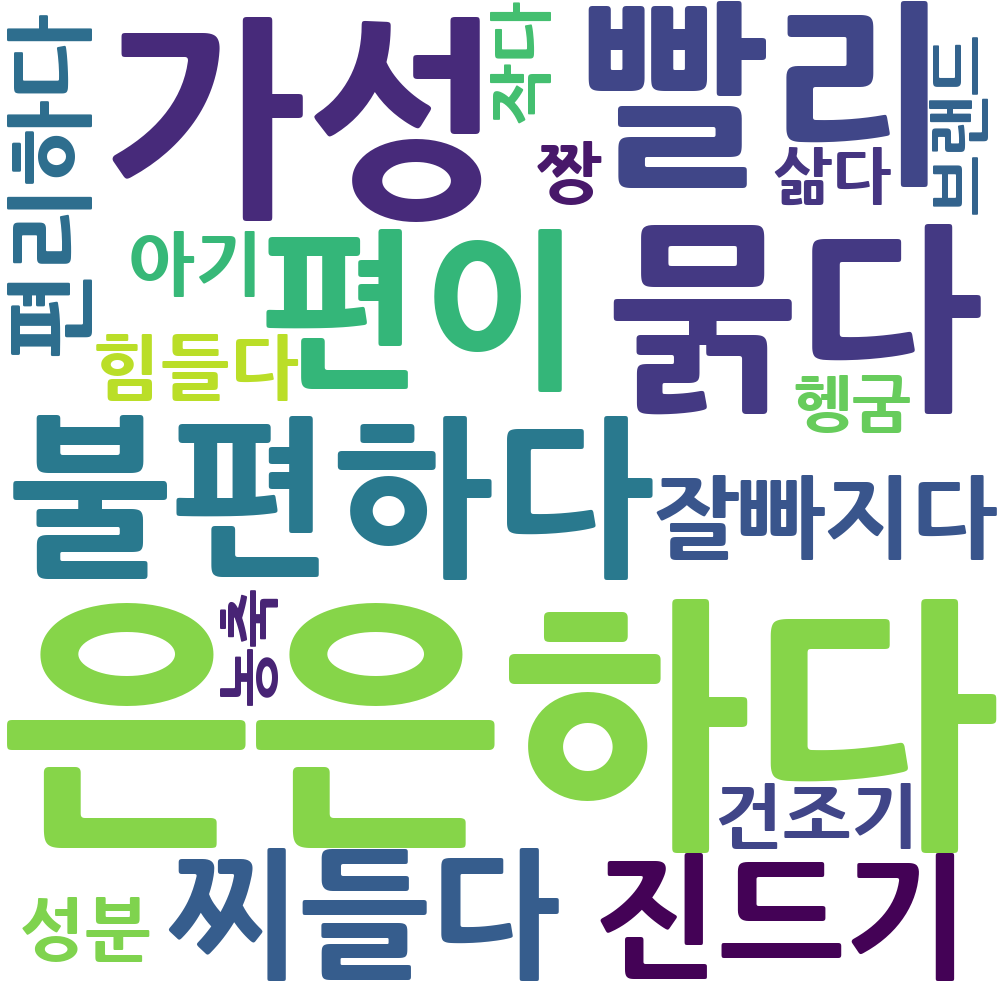

###### 전체 긍정 리뷰

In [ ]:
cond_1 = (coopang['label']==1)
label_1 = coopang.loc[cond_1]

In [ ]:
texts = label_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

whole_p_word_count = Counter(word_cloud)

In [ ]:
whole_p_word_count.most_common(20)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(whole_p_word_count))
wc.to_file("수정_긍정_리뷰.png")

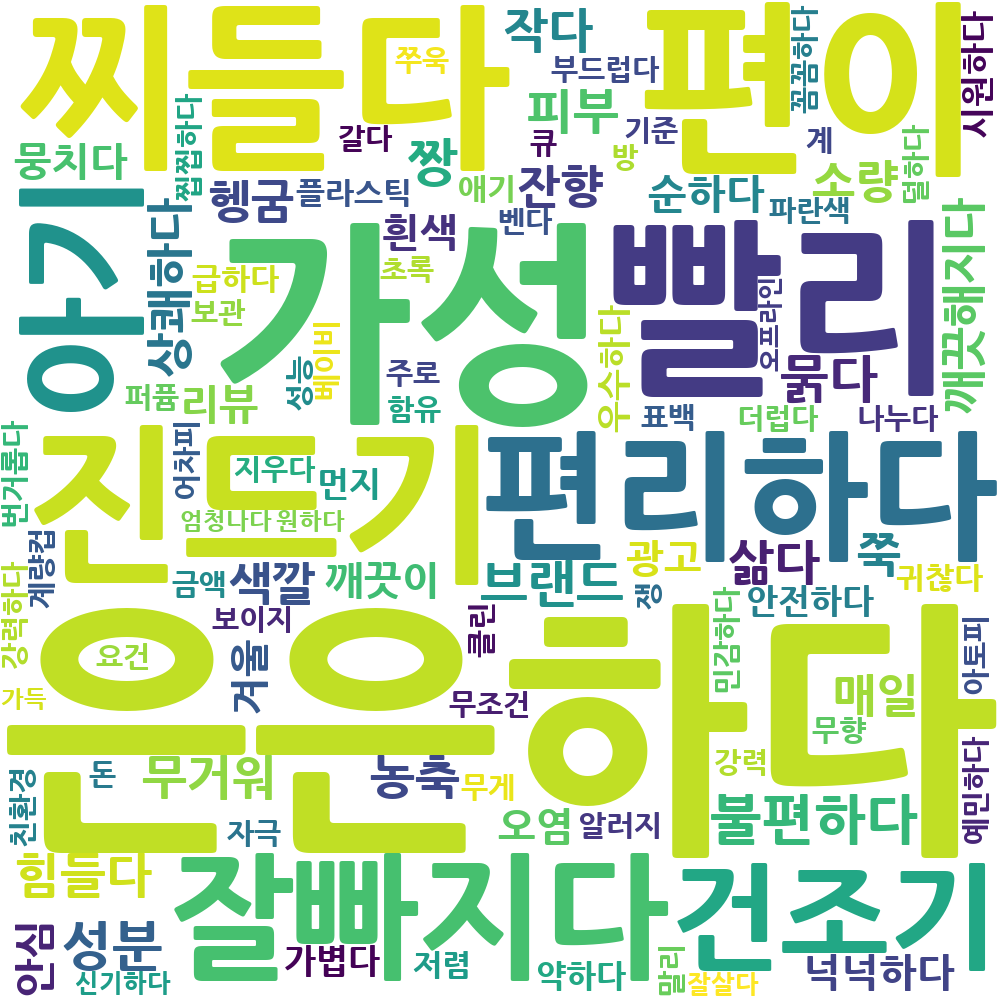

###### 전체 부정 리뷰

In [ ]:
cond_0 = (coopang['label']==0)
label_0 = coopang.loc[cond_0]

In [ ]:
texts = label_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

whole_n_word_count = Counter(word_cloud)

In [ ]:
whole_n_word_count.most_common(20)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(whole_n_word_count))
wc.to_file("수정_부정_리뷰.png")

###### 액체 전체 리뷰

In [ ]:
cond_liquid = (coopang['유형'] == '액체')
liquid = coopang.loc[cond_liquid]

In [ ]:
texts = liquid['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

liquid_word_count = Counter(word_cloud)

In [ ]:
liquid_word_count.most_common(10)

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(liquid_word_count))
wc.to_file("수정_액체_리뷰.png")

###### 액체 긍정 리뷰

In [ ]:
cond_liquid_1 = (liquid['label'] == 1)
liquid_1 = liquid.loc[cond_liquid_1]

In [ ]:
texts = liquid_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

liquid_p_word_count = Counter(word_cloud)

  0%|          | 0/7660 [00:00<?, ?it/s]

  0%|          | 0/7660 [00:00<?, ?it/s]

  0%|          | 0/7660 [00:00<?, ?it/s]

In [ ]:
liquid_p_word_count.most_common(20)

[('하다', 7786),
 ('좋다', 5981),
 ('향', 3649),
 ('세제', 3401),
 ('있다', 2261),
 ('세탁', 1863),
 ('빨래', 1632),
 ('제품', 1599),
 ('않다', 1473),
 ('때', 1329),
 ('냄새', 1143),
 ('가격', 1045),
 ('없다', 1043),
 ('너무', 975),
 ('세척', 811),
 ('잘', 723),
 ('용량', 714),
 ('하고', 713),
 ('저렴하다', 676),
 ('괜찮다', 614)]

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=50, max_font_size=300)
wc.generate_from_frequencies(dict(liquid_p_word_count))
wc.to_file("수정_액체_긍정_리뷰.png")

###### 액체 부정 리뷰

In [ ]:
cond_liquid_0 = (liquid['label'] == 0)
liquid_0 = liquid.loc[cond_liquid_0]

In [ ]:
texts = liquid_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

liquid_n_word_count = Counter(word_cloud)

  0%|          | 0/2819 [00:00<?, ?it/s]

  0%|          | 0/2819 [00:00<?, ?it/s]

  0%|          | 0/2819 [00:00<?, ?it/s]

In [ ]:
liquid_n_word_count.most_common(20)

[('하다', 2270),
 ('세제', 876),
 ('좋다', 818),
 ('향', 661),
 ('뚜껑', 535),
 ('있다', 444),
 ('제품', 422),
 ('않다', 413),
 ('냄새', 359),
 ('없다', 355),
 ('그냥', 345),
 ('아니다', 338),
 ('너무', 333),
 ('좀', 327),
 ('때', 270),
 ('모르다', 255),
 ('세탁', 249),
 ('빨래', 207),
 ('다른', 201),
 ('하고', 192)]

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=50, max_font_size=300)
wc.generate_from_frequencies(dict(liquid_n_word_count))
wc.to_file("수정_액체_부정_리뷰.png")

###### 분말 전체 리뷰

In [ ]:
cond_powder = (coopang['유형'] == '분말')
powder = coopang.loc[cond_powder]

In [ ]:
texts = powder['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

powder_word_count = Counter(word_cloud)

  0%|          | 0/3932 [00:00<?, ?it/s]

  0%|          | 0/3932 [00:00<?, ?it/s]

  0%|          | 0/3932 [00:00<?, ?it/s]

In [ ]:
powder_word_count.most_common(10)

[('하다', 3591),
 ('좋다', 2210),
 ('세제', 1741),
 ('있다', 909),
 ('세탁', 848),
 ('가격', 800),
 ('빨래', 783),
 ('때', 750),
 ('제품', 704),
 ('가루', 696)]

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(powder_word_count))
wc.to_file("수정_분말_리뷰.png")

###### 분말 긍정 리뷰

In [ ]:
cond_powder_1 = (powder['label'] == 1)
powder_1 = powder.loc[cond_powder_1]

In [ ]:
texts = powder_1['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

powder_p_word_count = Counter(word_cloud)

  0%|          | 0/2668 [00:00<?, ?it/s]

  0%|          | 0/2668 [00:00<?, ?it/s]

  0%|          | 0/2668 [00:00<?, ?it/s]

In [ ]:
powder_p_word_count.most_common(20)

[('하다', 2943),
 ('좋다', 1847),
 ('세제', 1471),
 ('있다', 754),
 ('세탁', 728),
 ('빨래', 707),
 ('가격', 672),
 ('때', 636),
 ('제품', 601),
 ('가루', 570),
 ('저렴하다', 493),
 ('향', 474),
 ('잘', 469),
 ('찬물', 464),
 ('않다', 434),
 ('없다', 399),
 ('많다', 369),
 ('녹다', 362),
 ('용량', 318),
 ('너무', 289)]

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=50, max_font_size=300)
wc.generate_from_frequencies(dict(powder_p_word_count))
wc.to_file("수정_분말_긍정_리뷰.png")

###### 분말 부정 리뷰

In [ ]:
cond_powder_0 = (powder['label'] == 0)
powder_0 = powder.loc[cond_powder_0]

In [ ]:
texts = powder_0['리뷰']

lst_clean = []

for text in tqdm(texts):
  lst_clean.append(re.sub("[^가-힣\\s]", "", text))

text_token = []

for text in tqdm(lst_clean):
  text_token.append(okt.morphs(text, stem=True))

word_cloud = []

for token_text in tqdm(text_token):
  word_cloud.extend([clean for clean in token_text if not clean in stop_words2])

from collections import Counter

powder_n_word_count = Counter(word_cloud)

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

In [ ]:
powder_n_word_count.most_common(20)

[('하다', 648),
 ('좋다', 363),
 ('세제', 270),
 ('있다', 155),
 ('않다', 142),
 ('가격', 128),
 ('가루', 126),
 ('세탁', 120),
 ('없다', 114),
 ('때', 114),
 ('제품', 103),
 ('잘', 102),
 ('녹다', 99),
 ('찬물', 97),
 ('향', 84),
 ('저렴하다', 82),
 ('그냥', 81),
 ('싸다', 79),
 ('빨래', 76),
 ('많다', 68)]

In [ ]:
from wordcloud import WordCloud

wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
             background_color='white', width=1000, height=1000, max_words=50, max_font_size=300)
wc.generate_from_frequencies(dict(powder_n_word_count))
wc.to_file("수정_분말_부정_리뷰.png")

### 벡터화
TF - IDF를 사용

In [ ]:
# 토큰화 및 불용어 제거 설정
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(review):
    review_text = re.sub("[^가-힣\\s]", "", review) # 한글 공백 외 모두 제거
    word_review = okt.morphs(review_text, stem=True) # 모든 형태소 사용
    morphs = [x for x in word_review if x not in stop_words2]
    return morphs

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))

##### 액체 데이터 벡터화

In [ ]:
liquid.shape

(10479, 6)

In [ ]:
# BoW
liquid_bow_vect = vect.fit_transform(liquid['리뷰'].tolist())

In [ ]:
# TF - IDFransformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  #수정
tfidf_vectorizer = TfidfTransformer()

liquid_tf_idf_vect = tfidf_vectorizer.fit_transform(liquid_bow_vect)

In [ ]:
# 액체 데이터 분할
from sklearn.model_selection import train_test_split

liquid_X = liquid_tf_idf_vect
liquid_Y = liquid['label']

liquid_X_train, liquid_X_test, liquid_Y_train, liquid_Y_test = train_test_split(liquid_X, liquid_Y, 
                                                                                test_size = 0.3,
                                                                                random_state = 1)

In [ ]:
print(liquid_X_train.shape)
print(liquid_X_test.shape)
print(liquid_Y_train.shape)
print(liquid_Y_test.shape)

(7335, 8291)
(3144, 8291)
(7335,)
(3144,)


##### 분말 데이터 벡터화

In [ ]:
powder.shape

(3932, 6)

In [ ]:
# BoW
powder_bow_vect = vect.fit_transform(powder['리뷰'].tolist())

In [ ]:
# TF - IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))  #수정
tfidf_vectorizer = TfidfTransformer()
powder_tf_idf_vect = tfidf_vectorizer.fit_transform(powder_bow_vect)

In [ ]:
# 분말 데이터 분할
from sklearn.model_selection import train_test_split

powder_X = powder_tf_idf_vect
powder_Y = powder['label']

powder_X_train, powder_X_test, powder_Y_train, powder_Y_test = train_test_split(powder_X, powder_Y, 
                                                                                test_size = 0.3,
                                                                                random_state = 1)

In [ ]:
print(powder_X_train.shape)
print(powder_X_test.shape)
print(powder_Y_train.shape)
print(powder_Y_test.shape)

(2752, 4688)
(1180, 4688)
(2752,)
(1180,)


## 모델링
세탁세제 유형별로 4종류의 머신러닝 모델을 사용하여, 각 유형별 적합한 모델을 사용한다


머선러닝 모델 : 나이브 베이즈, 로지스틕 분류, 랜덤 포레스트, XGBboost

### 모델링 기본 설정

In [ ]:
!pip install xgboost

In [ ]:
import numpy as np

# 사용할 모델
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

# 성능 평가 지표
from sklearn import metrics #추가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 액체세제 리뷰 모델링

##### 나이브

In [ ]:
naive = MultinomialNB()

naive_param_grid = {'alpha':[0.1, 0.3, 0.5, 0.7]}

gs_naive = GridSearchCV(naive,
                        param_grid = naive_param_grid,
                        cv=5,
                        scoring="accuracy",
                        n_jobs= -1
                       )
gs_naive.fit(liquid_X_train, liquid_Y_train)
naive_best = gs_naive.best_estimator_

naive_Y_pred = naive_best.predict(liquid_X_test)

print('나이브 베이즈 최고 점수 : {:.3f}'.format(gs_naive.best_score_))
print('나이브 베이즈 최적의 하이퍼 파라미터')
print(naive_best)

나이브 베이즈 최고 점수 : 0.802
나이브 베이즈 최적의 하이퍼 파라미터
MultinomialNB(alpha=0.1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


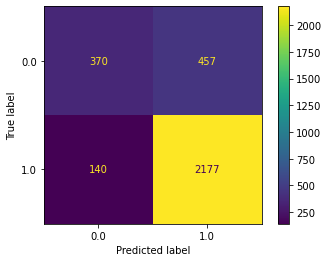

In [ ]:
# 혿동 행렬
plot_confusion_matrix(naive_best, liquid_X_test, liquid_Y_test)
plt.show()

In [ ]:
naive_accuracy = accuracy_score(y_true = liquid_Y_test, y_pred = naive_Y_pred)
naive_precision = precision_score(y_true = liquid_Y_test, y_pred = naive_Y_pred)
naive_recall = recall_score(y_true = liquid_Y_test, y_pred = naive_Y_pred)
naive_f1 = f1_score(y_true = liquid_Y_test, y_pred = naive_Y_pred)

In [ ]:
print('나이브 베이즈의 정확도 : {:,.3f}'.format(naive_accuracy))
print('나이브 베이즈의 정밀도 : {:,.3f}'.format(naive_precision))
print('나이브 베이즈의 재현율 : {:,.3f}'.format(naive_recall))
print('나이브 베이즈의 f1 : {:,.3f}'.format(naive_f1))

나이브 베이즈의 정확도 : 0.810
나이브 베이즈의 정밀도 : 0.826
나이브 베이즈의 재현율 : 0.940
나이브 베이즈의 f1 : 0.879


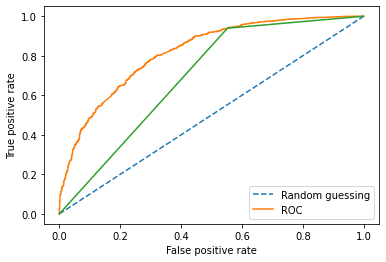


AUC : 0.819


In [ ]:
# ROC - AUC

test_predicted_prob=naive_best.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(liquid_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(liquid_Y_test, naive_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
naive_auc=metrics.auc(fpr, tpr) #metrics.auc 빠져있었음.
print('AUC : {:.3f}'.format(naive_auc))

##### 로지즈틱 분류

In [ ]:
logist = LogisticRegression()

logist_param_grid = {
        'C' : [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000],
        'max_iter' : [100,200,400,600,800]
}

gs_logist = GridSearchCV(logist,
                         param_grid = logist_param_grid,
                         cv=5,
                         scoring="accuracy",
                         n_jobs= -1
                       )

gs_logist.fit(liquid_X_train, liquid_Y_train)
logist_best = gs_logist.best_estimator_

logist_Y_pred = logist_best.predict(liquid_X_test)

print('로지스틱 분류 최고 점수 : {:.3f}'.format(gs_logist.best_score_))
print('로지스틱 분류 최적의 하이퍼 파라미터')
print(logist_best)

로지스틱 분류 최고 점수 : 0.806
로지스틱 분류 최적의 하이퍼 파라미터
LogisticRegression(C=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


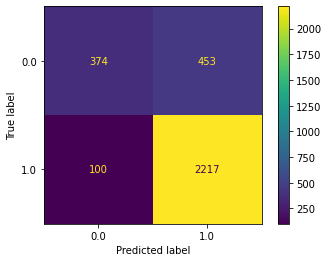

In [ ]:
# 혿동 행렬
plot_confusion_matrix(logist_best, liquid_X_test, liquid_Y_test)
plt.show()

In [ ]:
logist_accuracy = accuracy_score(y_true = liquid_Y_test, y_pred = logist_Y_pred)
logist_precision = precision_score(y_true = liquid_Y_test, y_pred = logist_Y_pred)
logist_recall = recall_score(y_true = liquid_Y_test, y_pred = logist_Y_pred)
logist_f1 = f1_score(y_true = liquid_Y_test, y_pred = logist_Y_pred)

In [ ]:
print('로지스틱 분류의 정확도 : {:,.3f}'.format(logist_accuracy))
print('로지스틱 분류의 정밀도 : {:,.3f}'.format(logist_precision))
print('로지스틱 분류의 재현율 : {:,.3f}'.format(logist_recall))
print('로지스틱 분류의 f1 : {:,.3f}'.format(logist_f1))

로지스틱 분류의 정확도 : 0.824
로지스틱 분류의 정밀도 : 0.830
로지스틱 분류의 재현율 : 0.957
로지스틱 분류의 f1 : 0.889


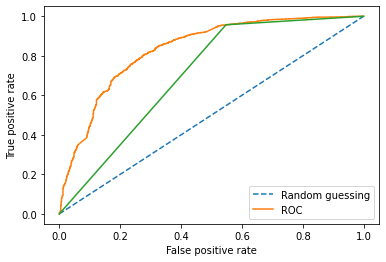


AUC : 0.833


In [ ]:
# ROC - AUC

test_predicted_prob=logist_best.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(liquid_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(liquid_Y_test, logist_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
logist_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(logist_auc))

##### 랜덤 포레스트

In [ ]:
# 랜덤 포레스트
RForest = RandomForestClassifier(random_state=0)

RForest_param_grid = {"max_depth": [5,7,9],
                      "min_samples_split": [3,5,7],
                      "min_samples_leaf": [3,5,7],
                      "n_estimators": [100, 200, 400],
                      "criterion": ["gini", "entropy"]}

gs_RForest = GridSearchCV(RForest,
                          param_grid = RForest_param_grid,
                          cv=5,
                          scoring="accuracy",
                          n_jobs= -1
                         )

gs_RForest.fit(liquid_X_train, liquid_Y_train)
RForest_best = gs_RForest.best_estimator_

RForest_Y_pred = RForest_best.predict(liquid_X_test)

print('랜덤 포레스트 최고 점수 : {:.3f}'.format(gs_RForest.best_score_)) #요기수정
print('랜덤 포레스트 최적의 하이퍼 파라미터')
print(RForest_best)

랜덤 포레스트 최고 점수 : 0.728
랜덤 포레스트 최적의 하이퍼 파라미터
RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


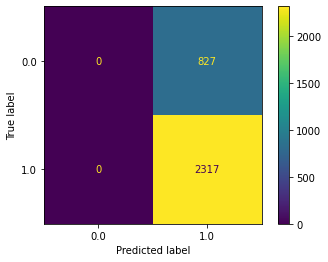

In [ ]:
# 혼동 행렬
plot_confusion_matrix(RForest_best, liquid_X_test, liquid_Y_test)
plt.show()
#과대적합

In [ ]:
RForest_accuracy = accuracy_score(y_true = liquid_Y_test, y_pred = RForest_Y_pred)
RForest_precision = precision_score(y_true = liquid_Y_test, y_pred = RForest_Y_pred)
RForest_recall = recall_score(y_true = liquid_Y_test, y_pred = RForest_Y_pred)
RForest_f1 = f1_score(y_true = liquid_Y_test, y_pred = RForest_Y_pred)

In [ ]:
print('랜덤포레스트의 정확도 : {:,.3f}'.format(RForest_accuracy))
print('랜덤포레스트의 정밀도 : {:,.3f}'.format(RForest_precision))
print('랜덤포레스트의 재현율 : {:,.3f}'.format(RForest_recall))
print('랜덤포레스트의 f1 : {:,.3f}'.format(RForest_f1))

랜덤포레스트의 정확도 : 0.737
랜덤포레스트의 정밀도 : 0.737
랜덤포레스트의 재현율 : 1.000
랜덤포레스트의 f1 : 0.849


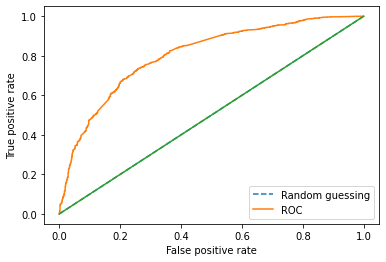


AUC : 0.804


In [ ]:
# ROC - AUC

test_predicted_prob=RForest_best.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(liquid_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(liquid_Y_test, RForest_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
RForest_auc = metrics.auc(fpr, tpr) #요기수정
print('AUC : {:.3f}'.format(RForest_auc))

##### XGB

In [ ]:
# Scikit-learn Wrapper XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# evals 변수 생성
evals = [(liquid_X_test,liquid_Y_test)]

# XGBClassifier 클래스의 객체 생성
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=00.5, max_depth=7)

# 모델 학습
xgb_wrapper.fit(liquid_X_train, liquid_Y_train, early_stopping_rounds=400, eval_set=evals, eval_metric="logloss",  verbose=True)

# 예측
pred = xgb_wrapper.predict(liquid_X_test)

# 평가 - 정확도 확인
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(liquid_Y_test, pred)
print('인공 신경망 예측 정확도: {0:.4f}'.format(accuracy), '\n')

[0]	validation_0-logloss:0.567505
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.520023
[2]	validation_0-logloss:0.500651
[3]	validation_0-logloss:0.487754
[4]	validation_0-logloss:0.479329
[5]	validation_0-logloss:0.473574
[6]	validation_0-logloss:0.466639
[7]	validation_0-logloss:0.46053
[8]	validation_0-logloss:0.458818
[9]	validation_0-logloss:0.454026
[10]	validation_0-logloss:0.454499
[11]	validation_0-logloss:0.451508
[12]	validation_0-logloss:0.449982
[13]	validation_0-logloss:0.447842
[14]	validation_0-logloss:0.446917
[15]	validation_0-logloss:0.444538
[16]	validation_0-logloss:0.44355
[17]	validation_0-logloss:0.442529
[18]	validation_0-logloss:0.441883
[19]	validation_0-logloss:0.439998
[20]	validation_0-logloss:0.43893
[21]	validation_0-logloss:0.438059
[22]	validation_0-logloss:0.437645
[23]	validation_0-logloss:0.437291
[24]	validation_0-logloss:0.435969
[25]	validation_0-logloss:0.435092
[26]	validation_0-logloss:0.434735

In [ ]:
from sklearn.model_selection import GridSearchCV  # 주의 Ram 용량이 20기가 이상 필요함

params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth' : [3, 5, 7],
    'n_estimators' : [100, 200, 400]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=3, verbose=1 ) #n_jobs =-1 은 모든코어사용
grid_cv.fit(liquid_X_train , liquid_Y_train, early_stopping_rounds=10, eval_set=evals, eval_metric="logloss",  verbose=True)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[350]	validation_0-logloss:0.613854
[351]	validation_0-logloss:0.613695
[352]	validation_0-logloss:0.613531
[353]	validation_0-logloss:0.613367
[354]	validation_0-logloss:0.613208
[355]	validation_0-logloss:0.613047
[356]	validation_0-logloss:0.612882
[357]	validation_0-logloss:0.612726
[358]	validation_0-logloss:0.612559
[359]	validation_0-logloss:0.612401
[360]	validation_0-logloss:0.612243
[361]	validation_0-logloss:0.612085
[362]	validation_0-logloss:0.611919
[363]	validation_0-logloss:0.611766
[364]	validation_0-logloss:0.611604
[365]	validation_0-logloss:0.611446
[366]	validation_0-logloss:0.611288
[367]	validation_0-logloss:0.611132
[368]	validation_0-logloss:0.61097
[369]	validation_0-logloss:0.610817
[370]	validation_0-logloss:0.610655
[371]	validation_0-logloss:0.610499
[372]	validation_0-logloss:0.610345
[373]	validation_0-logloss:0.610189
[374]	validation_0-logloss:0.610035
[375]	validation_0-logloss:0.609876
[376]	validation_0-logloss:0.

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


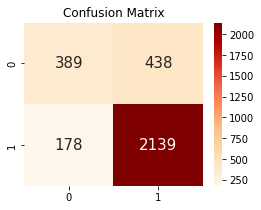

In [ ]:
#혼동 행렬
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confu = confusion_matrix(y_true = liquid_Y_test, y_pred = pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
xgb_accuracy = accuracy_score(y_true = liquid_Y_test, y_pred = pred)
xgb_precision = precision_score(y_true = liquid_Y_test, y_pred = pred)
xgb_recall = recall_score(y_true = liquid_Y_test, y_pred = pred)
xgb_f1 = f1_score(y_true = liquid_Y_test, y_pred = pred)

In [ ]:
print('xgb의 정확도 : {:,.3f}'.format(xgb_accuracy))
print('xgb의 정밀도 : {:,.3f}'.format(xgb_precision))
print('xgb의 재현율 : {:,.3f}'.format(xgb_recall))
print('xgb의 f1 : {:,.3f}'.format(xgb_f1))

xgb의 정확도 : 0.804
xgb의 정밀도 : 0.830
xgb의 재현율 : 0.923
xgb의 f1 : 0.874


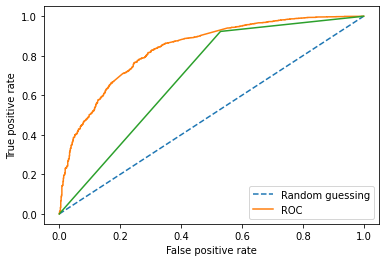


AUC : 0.835


In [ ]:
# ROC - AUC

test_predicted_prob=grid_cv.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(liquid_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(liquid_Y_test, pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
xgb_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(xgb_auc))

##### 결과

In [ ]:
dict_liquid_model = {
                    '모델' : ['나이브 베이즈', '로지스틱 분류', '랜덤 포레스트', 'XGB'],
                    '정확도': [naive_accuracy, logist_accuracy, RForest_accuracy, xgb_accuracy],
                    '정밀도' : [naive_precision, logist_precision, RForest_precision, xgb_precision],
                    '재현율' : [naive_recall, logist_recall, RForest_recall, xgb_recall],
                    'f1' : [naive_f1, logist_f1, RForest_f1, xgb_f1],
                    'AUC' : [naive_auc, logist_auc, RForest_auc, xgb_auc]
}

In [ ]:
df_liquid_model = pd.DataFrame(dict_liquid_model)
df_liquid_model

,모델,정확도,정밀도,재현율,f1,AUC
0,나이브 베이즈,0.810115,0.826500,0.939577,0.879418,0.818624
1,로지스틱 분류,0.824109,0.830337,0.956841,0.889112,0.833325
2,랜덤 포레스트,0.736959,0.736959,1.000000,0.848563,0.803666
3,XGB,0.804071,0.830035,0.923177,0.874132,0.834568


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

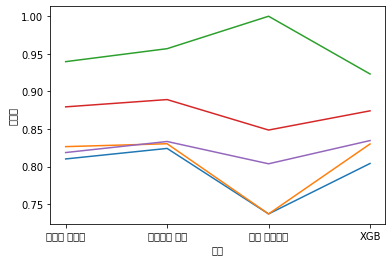

In [ ]:
sns.lineplot(data=df_liquid_model, x = '모델', y = '정확도')
sns.lineplot(data=df_liquid_model, x = '모델', y = '정밀도')
sns.lineplot(data=df_liquid_model, x = '모델', y = '재현율')
sns.lineplot(data=df_liquid_model, x = '모델', y = 'f1')
sns.lineplot(data=df_liquid_model, x = '모델', y = 'AUC')

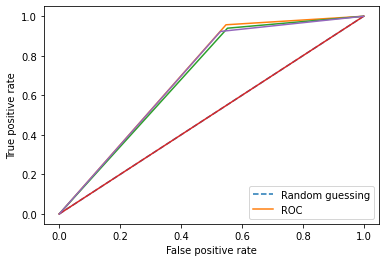


로지스틱 AUC : 0.705
나이브 베이즈  AUC : 0.693
랜덤포레스트 AUC : 0.705
xgb AUC : 0.705


In [ ]:
# ROC - AUC 액체


test_predicted_prob=logist_best.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(liquid_Y_test, test_predicted_prob[:,0])
fpr1,tpr1,thresholds = roc_curve(liquid_Y_test, naive_Y_pred)
fpr2,tpr2,thresholds = roc_curve(liquid_Y_test, RForest_Y_pred)
fpr3,tpr3,thresholds = roc_curve(liquid_Y_test, pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
total_auc1 = metrics.auc(fpr, tpr)
total_auc2 = metrics.auc(fpr1, tpr1)
total_auc3 = metrics.auc(fpr2, tpr2)
total_auc4 = metrics.auc(fpr3, tpr3)
print('로지스틱 AUC : {:.3f}'.format(total_auc1))
print('나이브 베이즈  AUC : {:.3f}'.format(total_auc2))
print('랜덤포레스트 AUC : {:.3f}'.format(total_auc3))
print('xgb AUC : {:.3f}'.format(total_auc4))


### 분말세제 리뷰  모델링

##### 나이브

In [ ]:
naive = MultinomialNB()

naive_param_grid = {'alpha':[0.1, 0.3, 0.5, 0.7]}

gs_naive = GridSearchCV(naive,
                        param_grid = naive_param_grid,
                        cv=5,
                        scoring="accuracy",
                        n_jobs= -1
                       )
gs_naive.fit(powder_X_train, powder_Y_train)
naive_best = gs_naive.best_estimator_

naive_Y_pred = naive_best.predict(powder_X_test)

print('나이브 베이즈 최고 점수 : {:.3f}'.format(gs_naive.best_score_))
print('나이브 베이즈 최적의 하이퍼 파라미터')
print(naive_best)

나이브 베이즈 최고 점수 : 0.713
나이브 베이즈 최적의 하이퍼 파라미터
MultinomialNB(alpha=0.3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


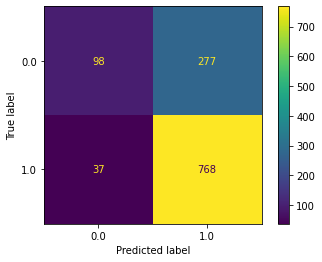

In [ ]:
# 혼동 행렬
plot_confusion_matrix(naive_best, powder_X_test, powder_Y_test)
plt.show()

In [ ]:
naive_accuracy = accuracy_score(y_true = powder_Y_test, y_pred = naive_Y_pred)
naive_precision = precision_score(y_true = powder_Y_test, y_pred = naive_Y_pred)
naive_recall = recall_score(y_true = powder_Y_test, y_pred = naive_Y_pred)
naive_f1 = f1_score(y_true = powder_Y_test, y_pred = naive_Y_pred)

In [ ]:
print('나이브 베이즈의 정확도 : {:,.3f}'.format(naive_accuracy))
print('나이브 베이즈의 정밀도 : {:,.3f}'.format(naive_precision))
print('나이브 베이즈의 재현율 : {:,.3f}'.format(naive_recall))
print('나이브 베이즈의 f1 : {:,.3f}'.format(naive_f1))

나이브 베이즈의 정확도 : 0.734
나이브 베이즈의 정밀도 : 0.735
나이브 베이즈의 재현율 : 0.954
나이브 베이즈의 f1 : 0.830


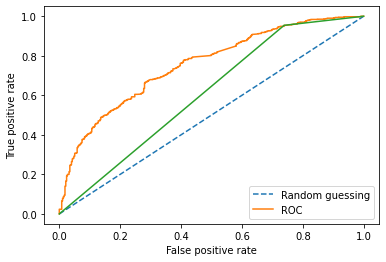


AUC : 0.754


In [ ]:
# ROC - AUC

test_predicted_prob=naive_best.predict_proba(powder_X_test)

fpr, tpr, thresholds = roc_curve(powder_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(powder_Y_test, naive_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
naive_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(naive_auc))

##### 로지스틱 분류

In [ ]:
logist = LogisticRegression()

logist_param_grid = {
        'C' : [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000],
        'max_iter' : [100,200,400,600,800]
}

gs_logist = GridSearchCV(logist,
                         param_grid = logist_param_grid,
                         cv=5,
                         scoring="accuracy",
                         n_jobs= -1
                       )

gs_logist.fit(powder_X_train, powder_Y_train)
logist_best = gs_logist.best_estimator_

logist_Y_pred = logist_best.predict(powder_X_test)

print('로지스틱 분류 최고 점수 : {:.3f}'.format(gs_logist.best_score_))
print('로지스틱 분류 최적의 하이퍼 파라미터')
print(logist_best)

로지스틱 분류 최고 점수 : 0.738
로지스틱 분류 최적의 하이퍼 파라미터
LogisticRegression(C=1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


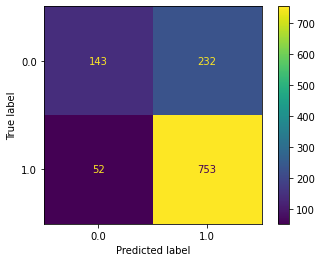

In [ ]:
# 혿동 행렬
plot_confusion_matrix(logist_best, powder_X_test, powder_Y_test)
plt.show()

In [ ]:
logist_accuracy = accuracy_score(y_true = powder_Y_test, y_pred = logist_Y_pred)
logist_precision = precision_score(y_true = powder_Y_test, y_pred = logist_Y_pred)
logist_recall = recall_score(y_true = powder_Y_test, y_pred = logist_Y_pred)
logist_f1 = f1_score(y_true = powder_Y_test, y_pred = logist_Y_pred)

In [ ]:
print('로지스틱 분류의 정확도 : {:,.3f}'.format(logist_accuracy))
print('로지스틱 분류의 정밀도 : {:,.3f}'.format(logist_precision))
print('로지스틱 분류의 재현율 : {:,.3f}'.format(logist_recall))
print('로지스틱 분류의 f1 : {:,.3f}'.format(logist_f1))

로지스틱 분류의 정확도 : 0.759
로지스틱 분류의 정밀도 : 0.764
로지스틱 분류의 재현율 : 0.935
로지스틱 분류의 f1 : 0.841


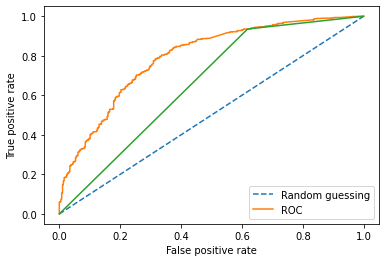


AUC : 0.792


In [ ]:
# ROC - AUC

test_predicted_prob=logist_best.predict_proba(powder_X_test)

fpr, tpr, thresholds = roc_curve(powder_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(powder_Y_test, logist_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
logist_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(logist_auc))

##### 랜덤 포레스트

In [ ]:
# 랜덤 포레스트
RForest = RandomForestClassifier(random_state=0)

RForest_param_grid = {"max_depth": [3,5,7,9],
                      "min_samples_split": [3,5,7],
                      "min_samples_leaf": [3,5,7],
                      "n_estimators": [100, 200,400],
                      "criterion": ["gini", "entropy"]}

gs_RForest = GridSearchCV(RForest,
                          param_grid = RForest_param_grid,
                          cv=5,
                          scoring="accuracy",
                          n_jobs= -1
                         )

gs_RForest.fit(powder_X_train, powder_Y_train)
RForest_best = gs_RForest.best_estimator_

RForest_Y_pred = RForest_best.predict(powder_X_test)

print('랜덤 포레스트 최고 점수 : {:.3f}'.format(gs_RForest.best_score_))
print('랜덤 포레스트 최적의 하이퍼 파라미터')
print(RForest_best)

랜덤 포레스트 최고 점수 : 0.677
랜덤 포레스트 최적의 하이퍼 파라미터
RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=3,
                       random_state=0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


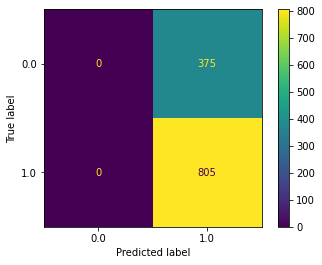

In [ ]:
# 혿동 행렬
plot_confusion_matrix(RForest_best, powder_X_test, powder_Y_test)
plt.show()

In [ ]:
RForest_accuracy = accuracy_score(y_true = powder_Y_test, y_pred = RForest_Y_pred)
RForest_precision = precision_score(y_true = powder_Y_test, y_pred = RForest_Y_pred)
RForest_recall = recall_score(y_true = powder_Y_test, y_pred = RForest_Y_pred)
RForest_f1 = f1_score(y_true = powder_Y_test, y_pred = RForest_Y_pred)

In [ ]:
print('랜덤포레스트의 정확도 : {:,.3f}'.format(RForest_accuracy))
print('랜덤포레스트의 정밀도 : {:,.3f}'.format(RForest_precision))
print('랜덤포레스트의 재현율 : {:,.3f}'.format(RForest_recall))
print('랜덤포레스트의 f1 : {:,.3f}'.format(RForest_f1))

랜덤포레스트의 정확도 : 0.682
랜덤포레스트의 정밀도 : 0.682
랜덤포레스트의 재현율 : 1.000
랜덤포레스트의 f1 : 0.811


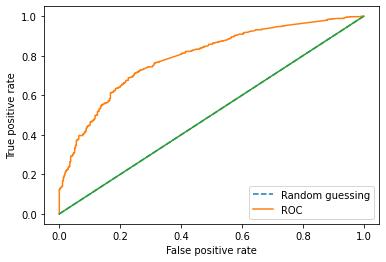


AUC : 0.792


In [ ]:
# ROC - AUC

test_predicted_prob=RForest_best.predict_proba(powder_X_test)

fpr, tpr, thresholds = roc_curve(powder_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(powder_Y_test, RForest_Y_pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
RForest_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(RForest_auc))

##### XGB

In [ ]:
# xgb
from xgboost import XGBClassifier

# evals 변수 생성
evals = [(powder_X_test,powder_Y_test)]

# XGBClassifier 클래스의 객체 생성
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=00.5, max_depth=7)

# 모델 학습
xgb_wrapper.fit(powder_X_train, powder_Y_train, early_stopping_rounds=400, eval_set=evals, eval_metric="logloss",  verbose=True)

# 예측
pred = xgb_wrapper.predict(powder_X_test)

# 평가 - 정확도 확인
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(powder_Y_test, pred)
print('인공 신경망 예측 정확도: {0:.4f}'.format(accuracy), '\n')

[0]	validation_0-logloss:0.590141
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.548984
[2]	validation_0-logloss:0.527724
[3]	validation_0-logloss:0.516349
[4]	validation_0-logloss:0.505453
[5]	validation_0-logloss:0.500899
[6]	validation_0-logloss:0.494661
[7]	validation_0-logloss:0.49109
[8]	validation_0-logloss:0.490932
[9]	validation_0-logloss:0.490469
[10]	validation_0-logloss:0.486827
[11]	validation_0-logloss:0.487535
[12]	validation_0-logloss:0.487449
[13]	validation_0-logloss:0.485873
[14]	validation_0-logloss:0.48628
[15]	validation_0-logloss:0.486769
[16]	validation_0-logloss:0.482088
[17]	validation_0-logloss:0.480385
[18]	validation_0-logloss:0.482073
[19]	validation_0-logloss:0.480113
[20]	validation_0-logloss:0.480818
[21]	validation_0-logloss:0.480415
[22]	validation_0-logloss:0.482454
[23]	validation_0-logloss:0.482207
[24]	validation_0-logloss:0.482518
[25]	validation_0-logloss:0.482739
[26]	validation_0-logloss:0.48096

In [ ]:
from sklearn.model_selection import GridSearchCV  # 주의 Ram 용량이 20기가 이상 필요함

params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth' : [3, 5, 7],
    'n_estimators' : [100, 200, 400]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=3, verbose=1 ) #n_jobs =-1 은 모든코어사용
grid_cv.fit(powder_X_train , powder_Y_train, early_stopping_rounds=10, eval_set=evals, eval_metric="logloss",  verbose=True)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[140]	validation_0-logloss:0.661987
[141]	validation_0-logloss:0.661797
[142]	validation_0-logloss:0.661603
[143]	validation_0-logloss:0.661405
[144]	validation_0-logloss:0.661214
[145]	validation_0-logloss:0.661025
[146]	validation_0-logloss:0.660832
[147]	validation_0-logloss:0.660636
[148]	validation_0-logloss:0.660444
[149]	validation_0-logloss:0.660256
[150]	validation_0-logloss:0.660069
[151]	validation_0-logloss:0.659882
[152]	validation_0-logloss:0.659686
[153]	validation_0-logloss:0.659497
[154]	validation_0-logloss:0.65931
[155]	validation_0-logloss:0.659121
[156]	validation_0-logloss:0.658935
[157]	validation_0-logloss:0.65875
[158]	validation_0-logloss:0.658557
[159]	validation_0-logloss:0.658373
[160]	validation_0-logloss:0.658185
[161]	validation_0-logloss:0.657993
[162]	validation_0-logloss:0.657803
[163]	validation_0-logloss:0.65762
[164]	validation_0-logloss:0.657437
[165]	validation_0-logloss:0.657255
[166]	validation_0-logloss:0.65

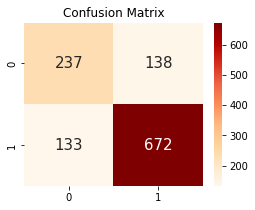

In [ ]:
#혼동 행렬
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confu = confusion_matrix(y_true = powder_Y_test, y_pred = pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
xgb_accuracy = accuracy_score(y_true = powder_Y_test, y_pred = pred)
xgb_precision = precision_score(y_true = powder_Y_test, y_pred = pred)
xgb_recall = recall_score(y_true = powder_Y_test, y_pred = pred)
xgb_f1 = f1_score(y_true = powder_Y_test, y_pred = pred)

In [ ]:
print('xgb의 정확도 : {:,.3f}'.format(xgb_accuracy))
print('xgb의 정밀도 : {:,.3f}'.format(xgb_precision))
print('xgb의 재현율 : {:,.3f}'.format(xgb_recall))
print('xgb의 f1 : {:,.3f}'.format(xgb_f1))

xgb의 정확도 : 0.770
xgb의 정밀도 : 0.830
xgb의 재현율 : 0.835
xgb의 f1 : 0.832


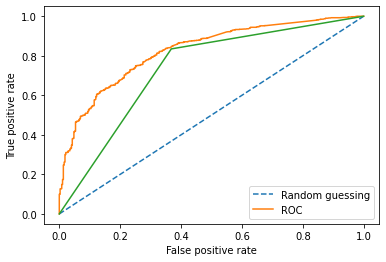


AUC : 0.826


In [ ]:
# ROC - AUC

test_predicted_prob=grid_cv.predict_proba(powder_X_test)

fpr, tpr, thresholds = roc_curve(powder_Y_test, test_predicted_prob[:,1])
fpr1,tpr1,thresholds = roc_curve(powder_Y_test, pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
xgb_auc = metrics.auc(fpr, tpr)
print('AUC : {:.3f}'.format(xgb_auc))

##### 결과

In [ ]:
dict_powder_model = {
                    '모델' : ['나이브 베이즈', '로지스틱 분류', '랜덤 포레스트', 'XGB'],
                    '정확도': [naive_accuracy, logist_accuracy, RForest_accuracy, xgb_accuracy],
                    '정밀도' : [naive_precision, logist_precision, RForest_precision, xgb_precision],
                    '재현율' : [naive_recall, logist_recall, RForest_recall, xgb_recall],
                    'f1' : [naive_f1, logist_f1, RForest_f1, xgb_f1],
                    'AUC' : [naive_auc, logist_auc, RForest_auc, xgb_auc]
}

In [ ]:
df_powder_model = pd.DataFrame(dict_powder_model)
df_powder_model

,모델,정확도,정밀도,재현율,f1,AUC
0,나이브 베이즈,0.733898,0.734928,0.954037,0.830270,0.753537
1,로지스틱 분류,0.759322,0.764467,0.935404,0.841341,0.792136
2,랜덤 포레스트,0.682203,0.682203,1.000000,0.811083,0.792242
3,XGB,0.770339,0.829630,0.834783,0.832198,0.825906


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

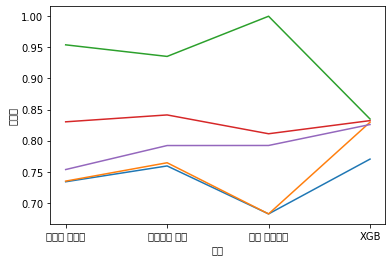

In [ ]:
sns.lineplot(data=df_powder_model, x = '모델', y = '정확도')
sns.lineplot(data=df_powder_model, x = '모델', y = '정밀도')
sns.lineplot(data=df_powder_model, x = '모델', y = '재현율')
sns.lineplot(data=df_powder_model, x = '모델', y = 'f1')
sns.lineplot(data=df_powder_model, x = '모델', y = 'AUC')

In [ ]:
# ROC - AUC 액체


test_predicted_prob=logist_best.predict_proba(liquid_X_test)

fpr, tpr, thresholds = roc_curve(powder_Y_test, test_predicted_prob[:,0])
fpr, tpr, thresholds = roc_curve(powder_Y_test, logist_Y_pred)
fpr1,tpr1,thresholds = roc_curve(powder_Y_test, naive_Y_pred)
fpr2,tpr2,thresholds = roc_curve(powder_Y_test, RForest_Y_pred)
fpr3,tpr3,thresholds = roc_curve(powder_Y_test, pred)

plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guessing')
plt.plot(fpr, tpr, label = 'ROC')
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()
print()
total_auc1 = metrics.auc(fpr, tpr)
total_auc2 = metrics.auc(fpr1, tpr1)
total_auc3 = metrics.auc(fpr, tpr)
total_auc4 = metrics.auc(fpr, tpr)
print('로지스틱 AUC : {:.3f}'.format(total_auc1))
print('나이브 베이즈  AUC : {:.3f}'.format(total_auc2))
print('랜덤포레스트 AUC : {:.3f}'.format(total_auc3))
print('xgb AUC : {:.3f}'.format(total_auc4))


ValueError: ignored